# CREDIT RISK ANALISIS -MACHINE LEARNING MODEL


## Part 1 - Credit Risk Analysis

## Business Problem: Credit Risk

**Context**

Financial institutions, such as banks and credit unions, face a critical challenge in accurately assessing credit risk when providing loans to individuals. One of the primary goals is to forecast the probability of a borrower defaulting on their loan, meaning they fail to repay as agreed. Loan defaults can result in significant financial losses, impacting the institution's profitability and stability. To manage these risks, it is crucial to develop reliable predictive models that can identify potential defaulters before credit is extended. These models rely on various demographic, financial, and historical data related to customers.

**Problem Description**
The task is to create a predictive model for credit risk using a dataset that mimics credit bureau information.

The objective is to predict loan status (default or non-default) based on the given dataset features.

#Objective
Develop a machine learning model that can accurately predict whether a customer is likely to default on a loan (loan_status = 1), using the available features in the dataset.

#Dataset
The dataset includes the following columns:

- person_age: The person's age

- person_income: The person's annual income

- person_home_ownership: Type of home ownership (e.g., rent, own, etc.)

- person_emp_length: Number of years in current employment

- loan_intent: Purpose of the loan (e.g., personal, educational, etc.)

- loan_grade: Grade of the loan

- loan_amnt: Amount of the loan

- loan_int_rate: Interest rate on the loan

- loan_status: Status of the loan (0 for non-default, 1 for default)

- loan_percent_income: Percentage of income devoted to the loan

- cb_person_default_on_file: Whether the person has a previous default on file (Yes or No)

- cb_person_cred_hist_length: Length of the credit history in years


#Approach
**1. Data Exploration**

Examine the distribution of all variables.
Identify any missing data or inconsistencies.
Explore the relationship between the independent features and the dependent variable (loan_status).

**2. Data Preprocessing**

Address any missing data.
Encode categorical variables.
Normalize or standardize numerical data if necessary.

**3. Data Splitting**

Divide the dataset into training and testing sets.

**4. Modeling**

Choose suitable machine learning algorithms (e.g., Logistic Regression, Random Forest, XGBoost).
Train several models and fine-tune hyperparameters.

**5. Model Evaluation**

Use performance metrics like AUC-ROC, precision, recall, and F1-score to evaluate the models.
Select the model that offers the best balance across these metrics.

**6. Interpreting Results**

Identify the key variables contributing to credit risk predictions.
Analyze the patterns and insights revealed by the model.

**7. Implementation**
Build a practical solution that incorporates the predictive model into the credit approval process used by financial institutions.
#Goals
Reduce the loan default rate by identifying high-risk borrowers before extending credit.
Enhance the accuracy and efficiency of credit risk assessments.
Provide actionable insights to improve credit policies and strategies.
#Challenges
Ensuring model accuracy to minimize false positives (labeling a reliable borrower as risky) and false negatives (labeling a risky borrower as safe).
Ensuring fairness and eliminating bias in the model to provide equal treatment across all customer groups.
Seamlessly integrating the predictive model into the existing systems of financial institutions.
By developing an effective credit risk prediction model, financial institutions can safeguard their financial health, mitigate risk, and make more informed lending decisions.

In [1]:
# Installing packages
!pip install watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

pandas    : 2.2.2
matplotlib: 3.7.1
plotly    : 5.24.1
numpy     : 1.26.4
google    : 2.0.3
watermark : 2.5.0
re        : 2.2.1
platform  : 1.0.8
seaborn   : 0.13.2



## Part 2 - Database

In [4]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
train_df = pd.read_csv("/content/drive/MyDrive/credit_risk_dataset.csv")
train_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
# Viewing first 5 data
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
# Viewing 5 latest data
train_df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [7]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
# Type dados
train_df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [9]:
# Viewing rows and columns
train_df.shape

(32581, 12)

# Part 3 - Exploratory data analysis

In [10]:
# Exploratory data analysis (EDA)
print("\nDescriptive statistics of the training set")
train_df.describe().T


Descriptive statistics of the training set


,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [11]:
# Analysis of categorical and numerical variables
categorical_features = train_df.select_dtypes(include=['object']).columns
numerical_features = train_df.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
Numeric Variables: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [12]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(train_df[col].value_counts())


Distribution of categorical variable person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Distribution of categorical variable loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Distribution of categorical variable loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Distribution of categorical variable cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


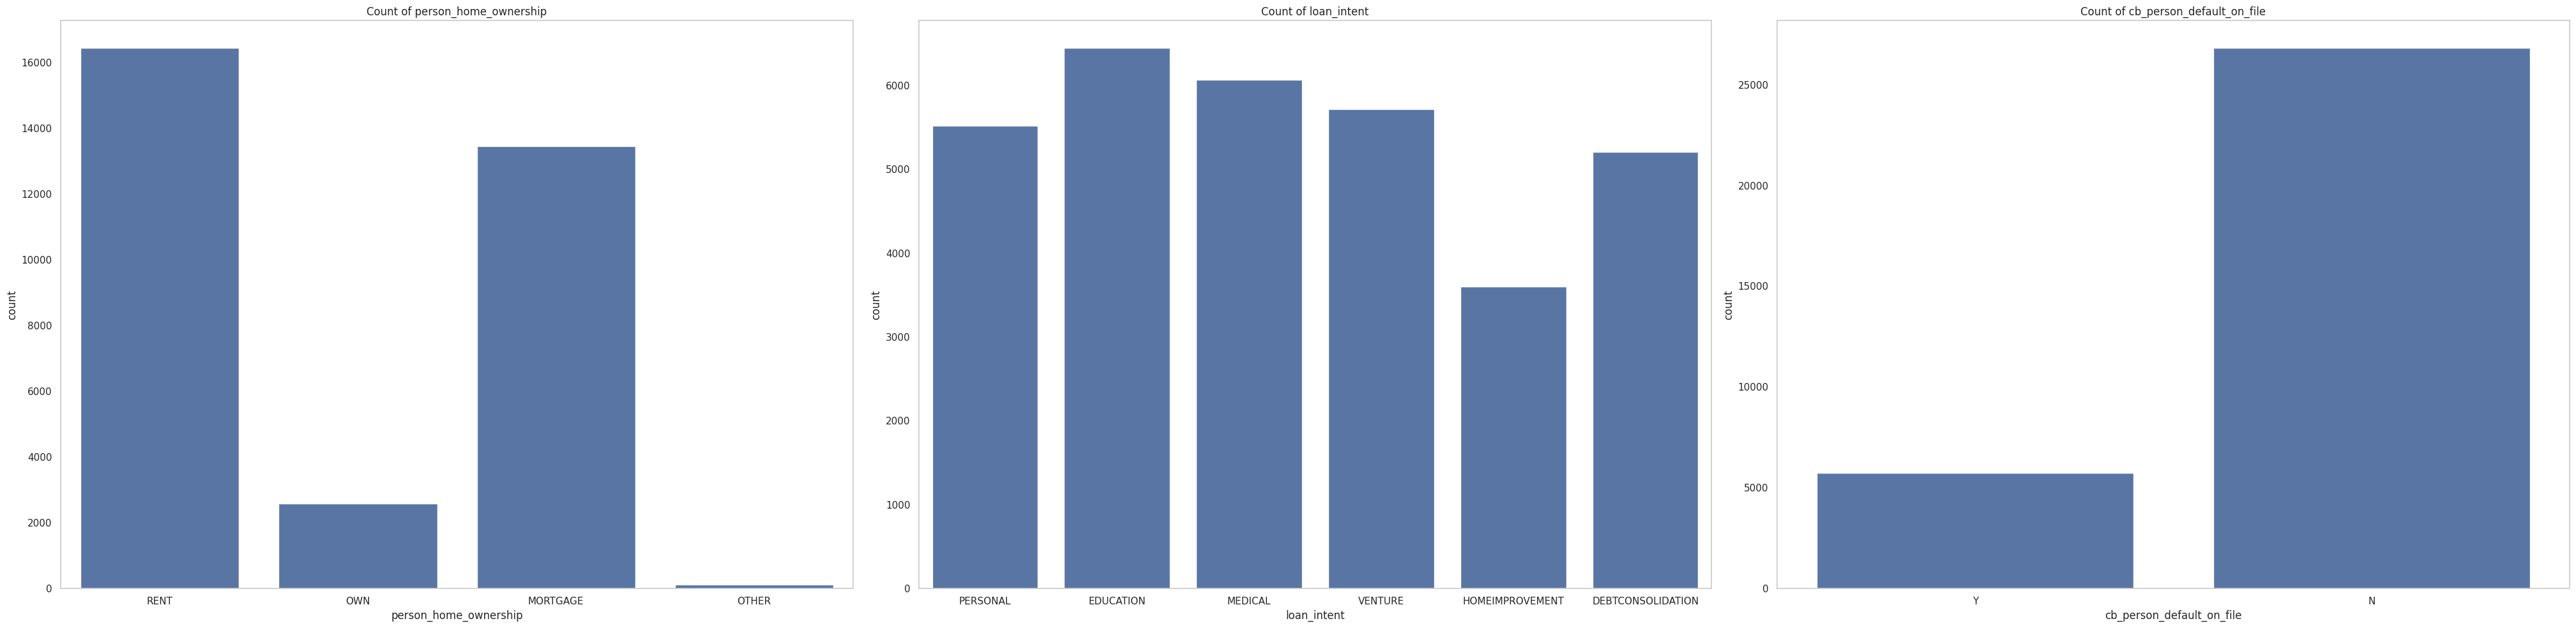

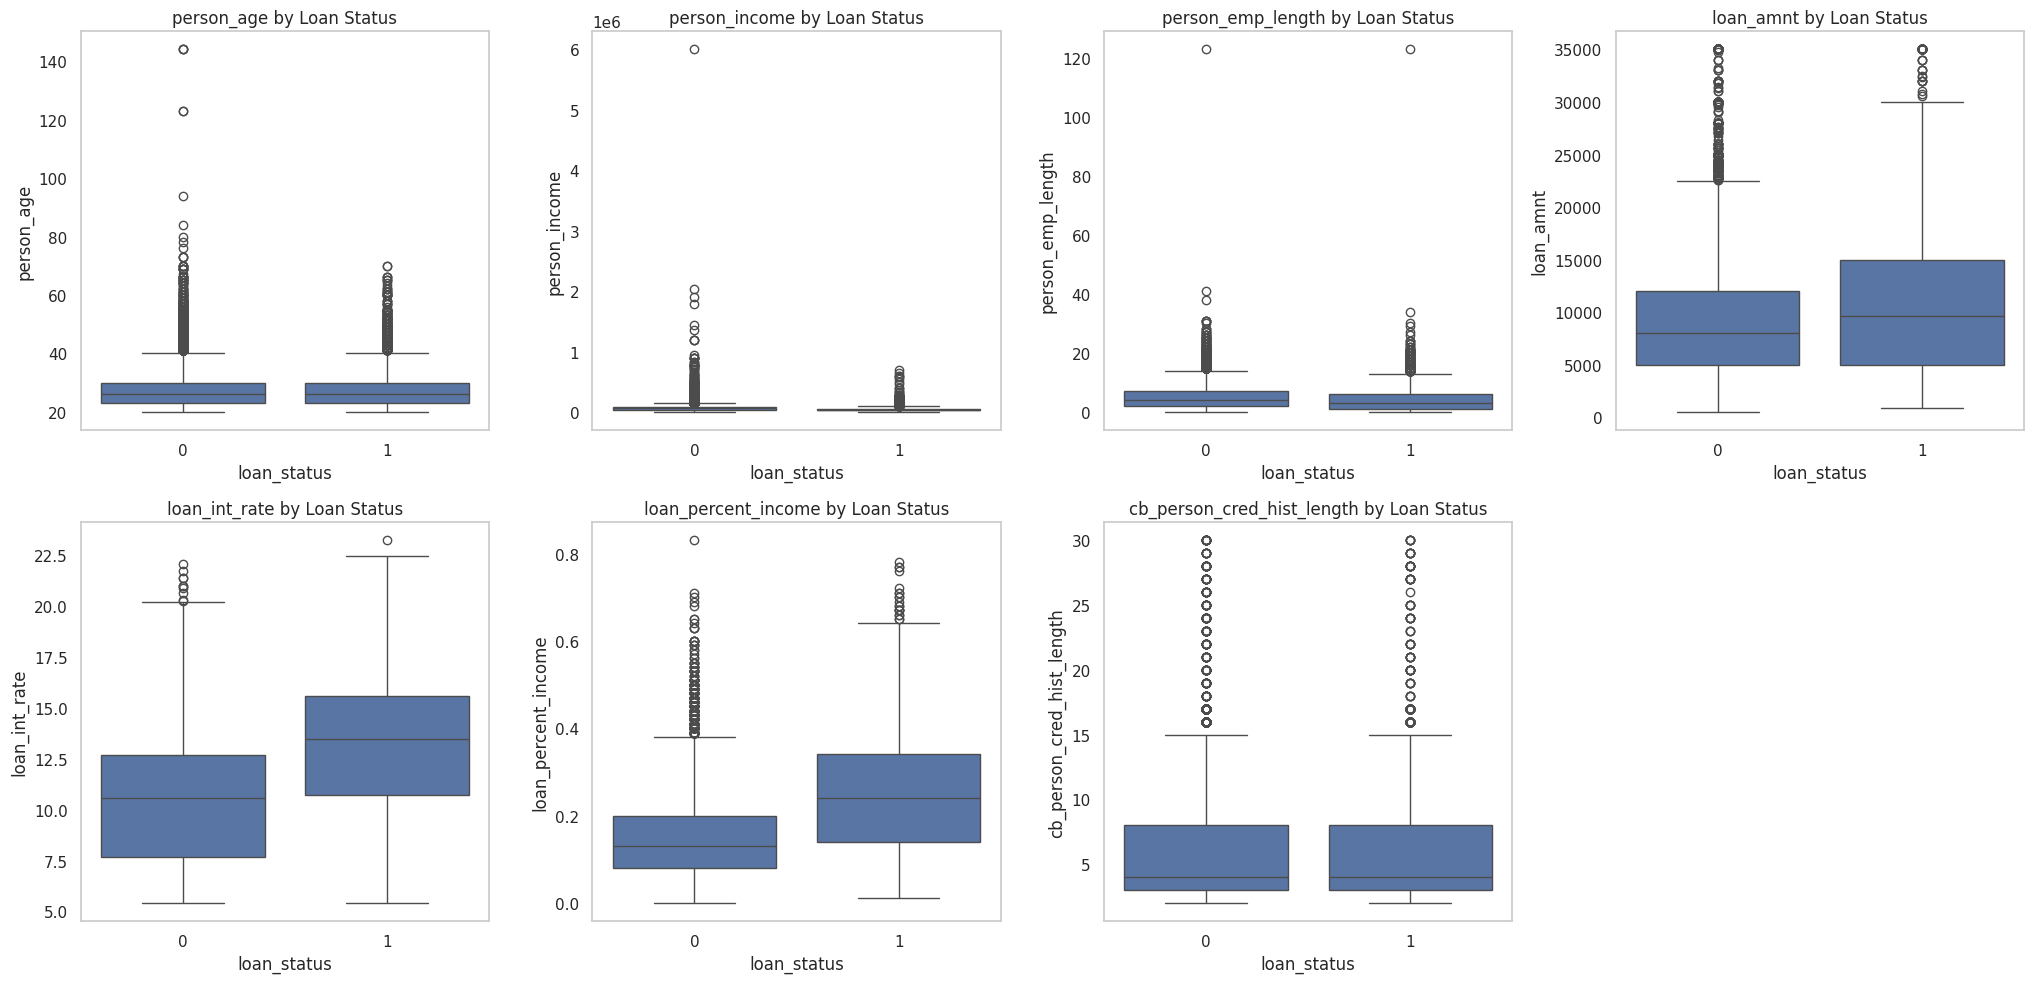

In [13]:
# 2. Counting categorical variables
plt.figure(figsize=(40.5, 10))
categorical_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=train_df[col])
    plt.title(f'Count of {col}')
    plt.grid(False)
    plt.tight_layout()
plt.show()

# 4. Comparison of distributions
numerical_cols = ['person_age', 'person_income','person_emp_length', 'loan_amnt',
                  'loan_int_rate', 'loan_percent_income',
                  'cb_person_cred_hist_length']

# Boxplots chart
print()
print()
plt.figure(figsize=(20.5, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=col, data=train_df)
    plt.title(f'{col} by Loan Status')
    plt.grid(False)
plt.tight_layout()
plt.show()

raphs that compare the distributions of categorical variables are key tools in data analysis because they help us see how different categories relate to a specific variable.

This method is important in understanding data and spotting trends. Different types of graphs, like histograms, box plots, and bar charts, each serve a purpose. For example, histograms show how a continuous variable is distributed and how often different ranges occur. Box plots help us identify outliers and show the spread of data through quartiles, while bar charts are great for comparing the frequencies of different categories within a categorical variable.

By looking at how different groups or categories are distributed, we can find important patterns and differences that can influence decision-making and help us form hypotheses. These graphs are commonly used in various fields, such as market research, performance analysis, and public health studies.

Overall, these visualizations help us detect trends, relationships, and even unusual findings in the data, making our analysis more comprehensive and accurate.


Distribution of target variable 'Target':
loan_status
0    25473
1     7108
Name: count, dtype: int64


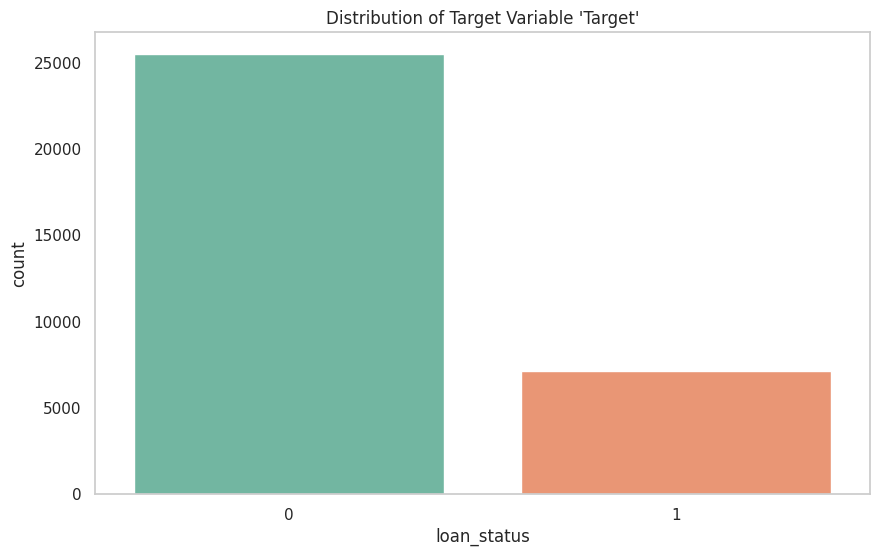

In [14]:
# Analysis of target variable 'Target'
print("\nDistribution of target variable 'Target':")
print(train_df['loan_status'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='loan_status', palette='Set2')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

Here we can see graphs that compare distributions of categorical variables. These graphs are fundamental for data analysis, as they allow you to visualize how different categories are distributed in relation to a specific variable.
In this context, the bar chart of the target variable called loan_status is especially relevant. This variable represents cases of credit approval, indicating whether the credit was approved (yes) or not (no).

Comparing distributions is an essential technique in descriptive statistics and exploratory data analysis, providing valuable insights into the central tendency, dispersion, and pattern of data. These graphs can include histograms, box plots, bar graphs, among others, each with its advantages and contexts of use. For example, histograms are useful for visualizing the distribution of a continuous variable and understanding the frequency of occurrences within different ranges. Box plots, on the other hand, are excellent for identifying outliers and understanding the distribution of data in terms of quartiles. Bar charts, such as the one used for the loan_status variable, are widely used to compare the frequency of different categories of a categorical variable.

The bar graph for the loan_status variable allows us to clearly visualize the number of cases in which the credit was approved versus the cases in which it was not. This visualization is crucial for understanding the ratio of approvals to denials, which can inform strategic decisions about credit policies and risk assessment.

Furthermore, by comparing distributions of different groups or categories, it is possible to identify significant patterns and differences that can guide decision-making and hypothesis formulation. These graphs are frequently used in various areas, such as market research, performance analysis, epidemiological studies, among others.

Through these visualizations, we can detect trends, correlations and even possible anomalies in the data, facilitating a more in-depth and accurate analysis.

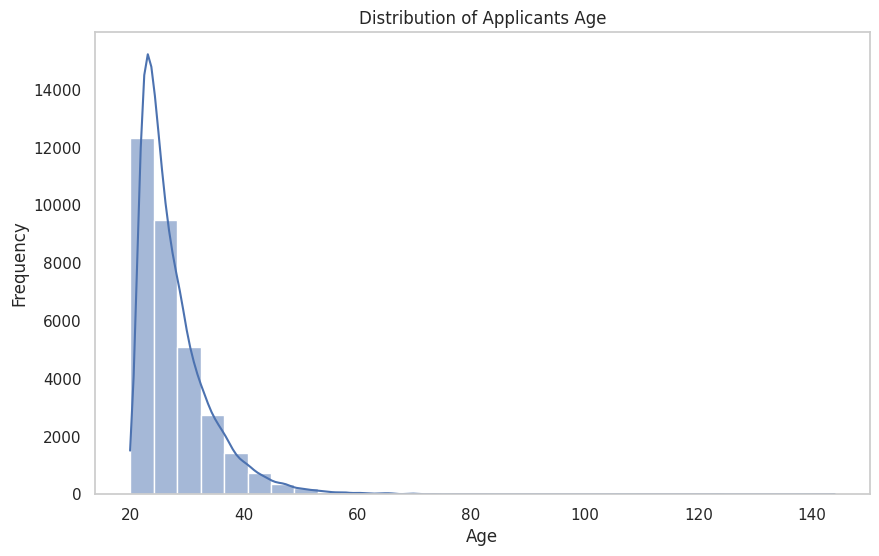

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='person_age', bins=30, kde=True, palette='Set2')
plt.title('Distribution of Applicants Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Here we can see graphs that compare distributions of categorical and continuous variables. These graphs are fundamental for data analysis, as they allow you to visualize how different categories are distributed in relation to a specific variable.

In this context, the bar chart of the target variable called **loan_status** is especially relevant. This variable represents cases of credit approval, indicating whether the credit was approved (yes) or not (no). The bar graph for the variable **loan_status** allows us to clearly visualize the number of cases in which the credit was approved versus the cases in which it was not. This visualization is crucial for understanding the ratio of approvals to denials, which can inform strategic decisions about credit policies and risk assessment.

Additionally, we have a histogram graph that shows the distribution of credit card transaction ages, ranging from 20 to 40 years. Histograms are useful for visualizing the distribution of a continuous variable and understanding the frequency of occurrences within different ranges. This specific histogram allows us to observe how customer ages distribute within this range, providing insights into the demographics of credit card users.

Comparing distributions is an essential technique in descriptive statistics and exploratory data analysis, providing valuable insights into the central tendency, dispersion, and pattern of data. These graphs can include histograms, box plots, bar graphs, among others, each with its advantages and contexts of use.

For example, box plots are excellent for identifying outliers and understanding the distribution of data in terms of quartiles. Bar graphs, such as the one used for the variable **loan_status**, are widely used to compare the frequency of different categories of a categorical variable.

Furthermore, by comparing distributions of different groups or categories, it is possible to identify significant patterns and differences that can guide decision-making and hypothesis formulation. These graphs are frequently used in various areas, such as market research, performance analysis, epidemiological studies, among others.

Through these visualizations, we can detect trends, correlations and even possible anomalies in the data, facilitating a more in-depth and accurate analysis.

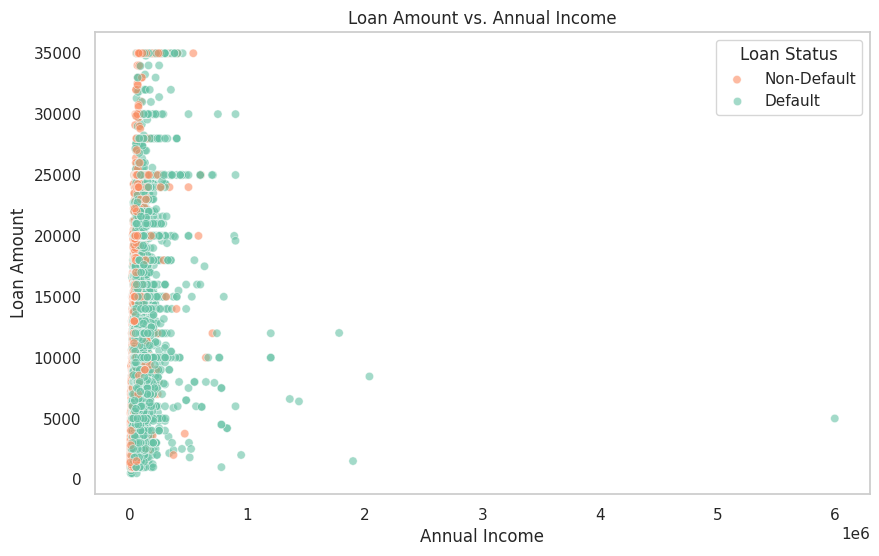

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6, palette='Set2')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In this graph, we can observe the relationship between the loan amount and income. In addition to visualizing this correlation, it is possible to identify some data that stand out as outliers. These outliers represent values ​​that are significantly outside the standard of other data, which may indicate anomalies or specific situations that deserve more detailed analysis. Furthermore, the graph allows us to understand the general distribution of values, identify trends and patterns, and evaluate how revenue can influence the value of loans granted.

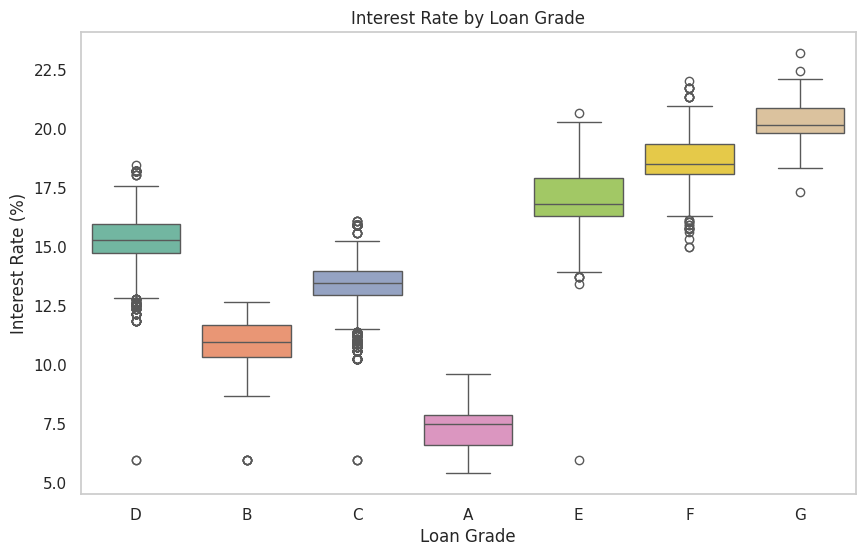

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='loan_grade', y='loan_int_rate', palette='Set2')
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.grid(False)
plt.show()

In this boxplot chart, we can analyze the relationship between the interest rate and the loan grade. The boxplot allows us to visualize the distribution of interest rates for each loan grade, highlighting the median, quartiles and the presence of outliers. Observing the graph, it is possible to identify how interest rates vary between different loan levels, highlighting which levels have greater or lesser dispersion. Additionally, the chart gives us insights into the consistency of rates applied across each loan category and can reveal important trends for risk assessment and credit policies.

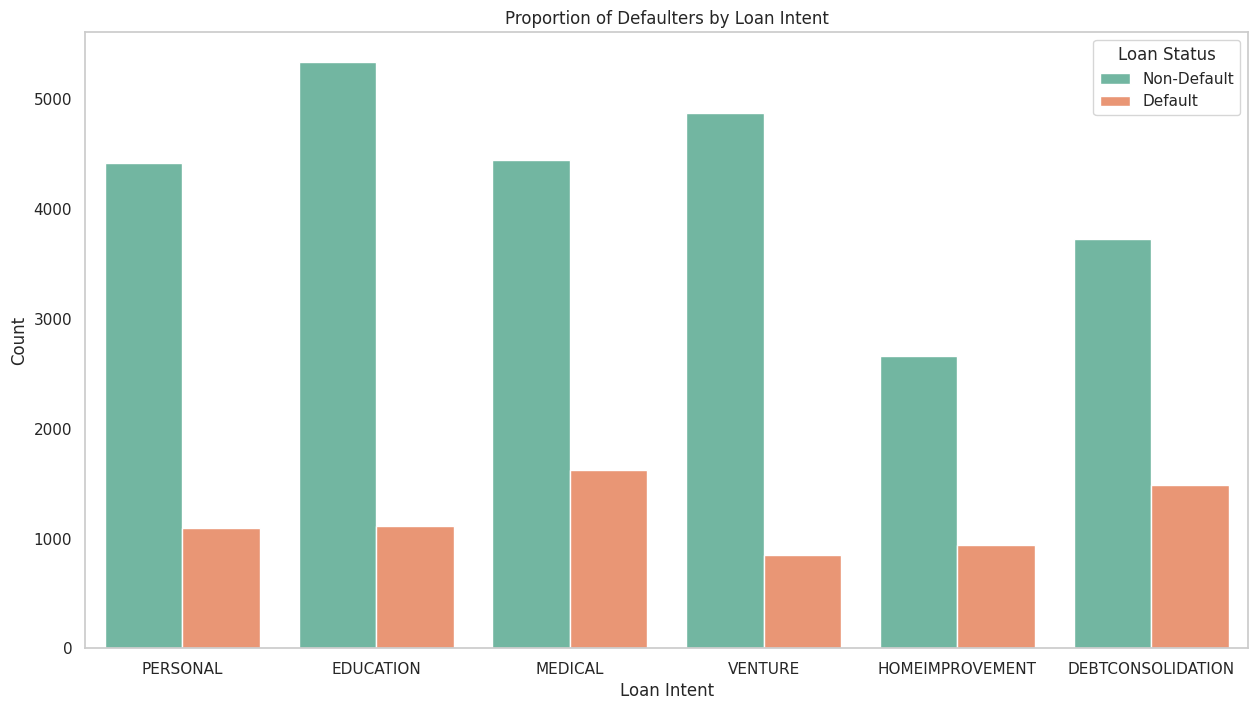

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train_df, x='loan_intent', hue='loan_status', palette='Set2')
plt.title('Proportion of Defaulters by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In this bar graph, we can analyze the distribution of people's profession degrees in relation to credit risk, categorized as "yes" or "no". The graph illustrates the number of individuals in each professional category who present credit risk, allowing a direct comparison between different professions. This visualization is crucial to understanding which professions are most associated with high credit risks and which are considered safer. Additionally, the chart can help identify patterns and trends in risk assessment, offering valuable insights to financial institutions when making credit decisions.

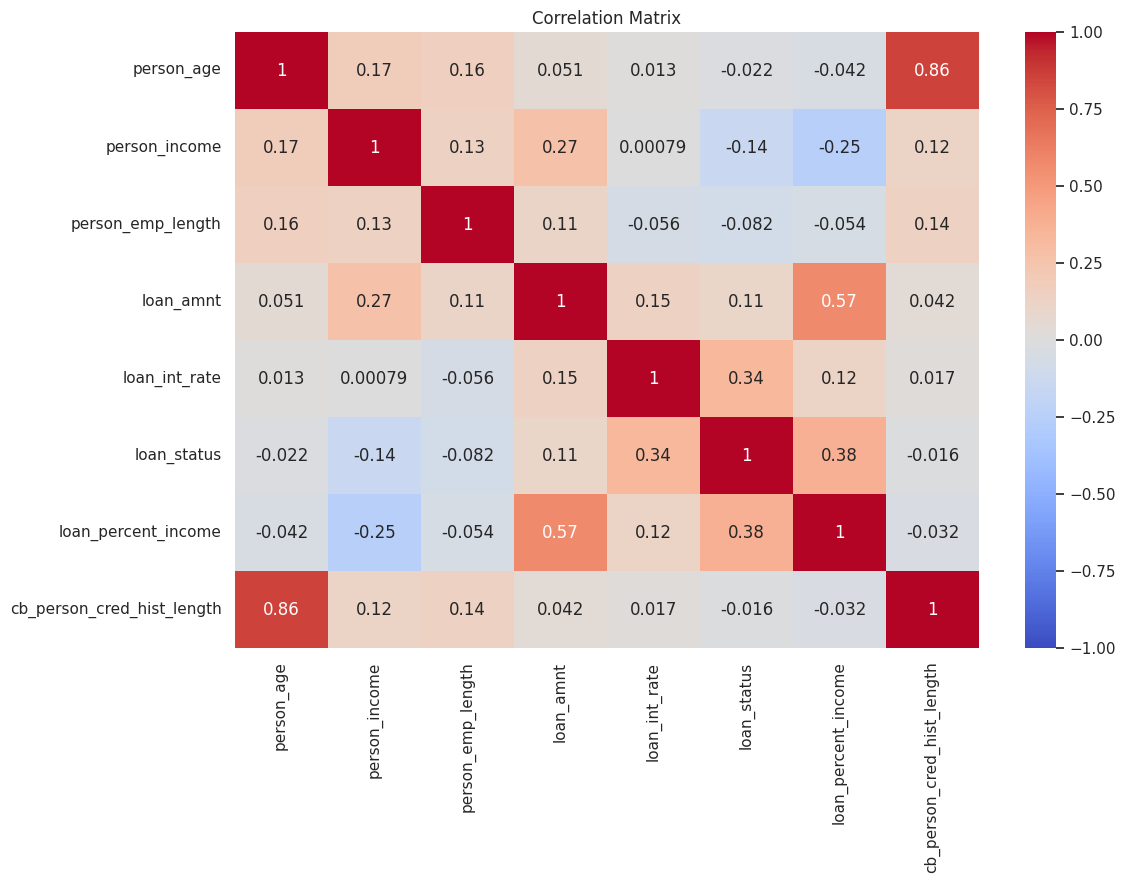

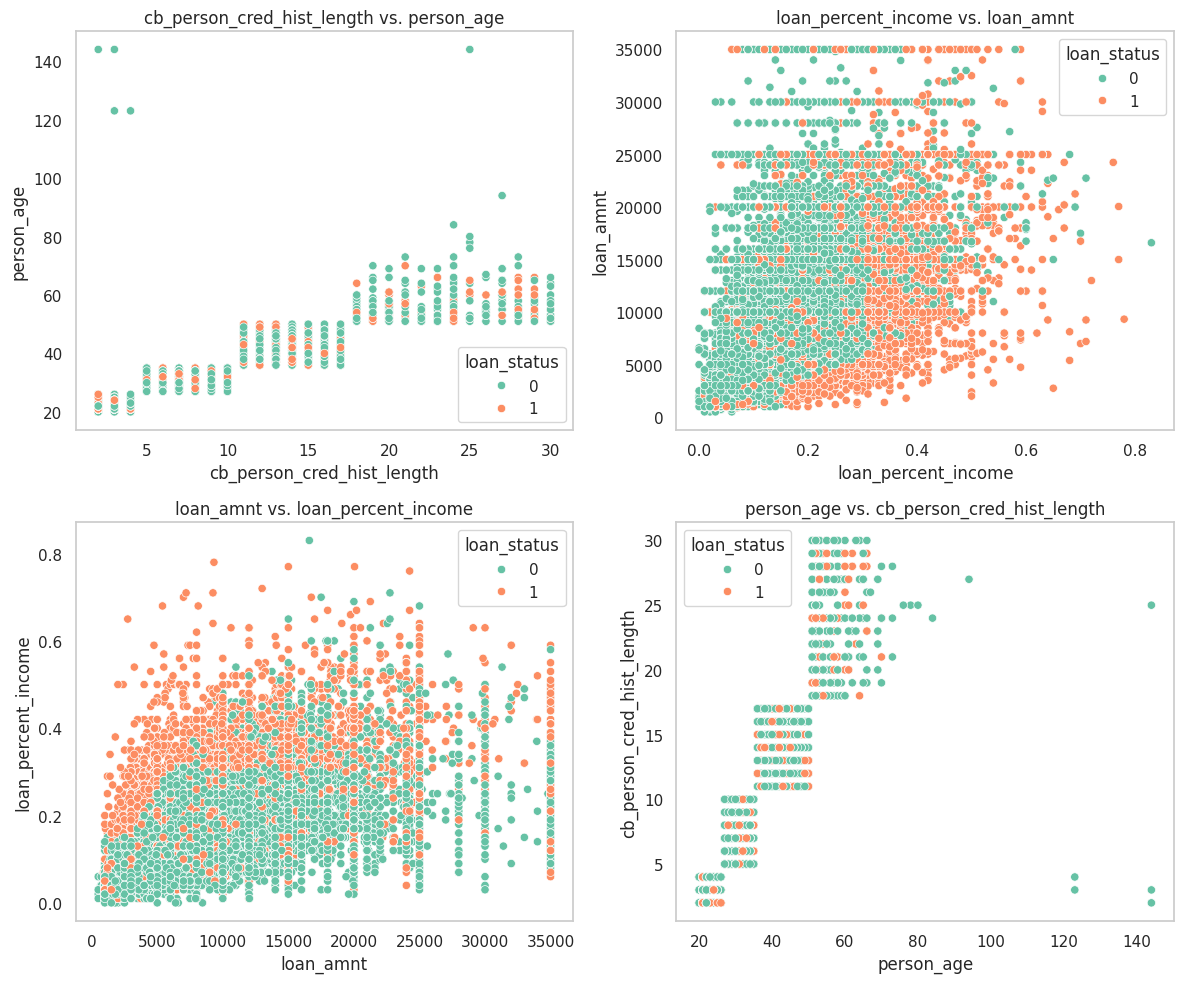

In [19]:
# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_data = train_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Defining subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graphic 1
sns.scatterplot(x="cb_person_cred_hist_length", y="person_age", data=train_df, hue="loan_status", palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('cb_person_cred_hist_length vs. person_age')
axes[0, 0].grid(False)

# Chart 2
sns.scatterplot(x="loan_percent_income", y="loan_amnt", data=train_df, hue="loan_status", palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('loan_percent_income vs. loan_amnt')
axes[0, 1].grid(False)

# Chart 3
sns.scatterplot(x="loan_amnt", y="loan_percent_income", data=train_df, hue="loan_status", palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('loan_amnt vs. loan_percent_income')
axes[1, 0].grid(False)

# Chart 4
sns.scatterplot(x="person_age", y="cb_person_cred_hist_length", data=train_df, hue="loan_status", palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('person_age vs. cb_person_cred_hist_length')
axes[1, 1].grid(False)

# Adjusting the layout
plt.tight_layout()
plt.show()

In this correlation graph, we can observe both positive and negative correlations between several important variables. Correlation analysis is essential for identifying the strength and direction of relationships between different factors. Some notable examples of correlations present in the chart include:

- **Interest Rate by Loan Grade and Person's Age:** With a very high correlation of 0.86, this data indicates that as the loan grade varies, there is a significant trend related to the age of the applicants. This may suggest that loans of different grades are predominantly granted to specific age groups.

- **Loan Percentage in Relation to Income and Loan Amount:** Presenting a high correlation of 0.57, this data suggests that as the loan amount increases, the proportion of income committed to the loan also tends to increase. This insight is crucial for assessing borrowers' repayment capacity and managing credit risk.

- **Person's Age and Length of Person's Credit History:** Another high correlation of 0.86 indicates that older people tend to have a longer credit history. This pattern is expected as older individuals naturally accumulate more years of financial history, which may influence their loan eligibility and terms.

These correlations highlight important relationships and can provide valuable insights for credit risk analysis, helping to understand how different factors are interrelated. Detailed analysis of these correlations allows you to identify trends, predict behavior and make more informed decisions in financial contexts. Furthermore, identifying strong correlations can help create more accurate predictive models, improving risk management and resource allocation.

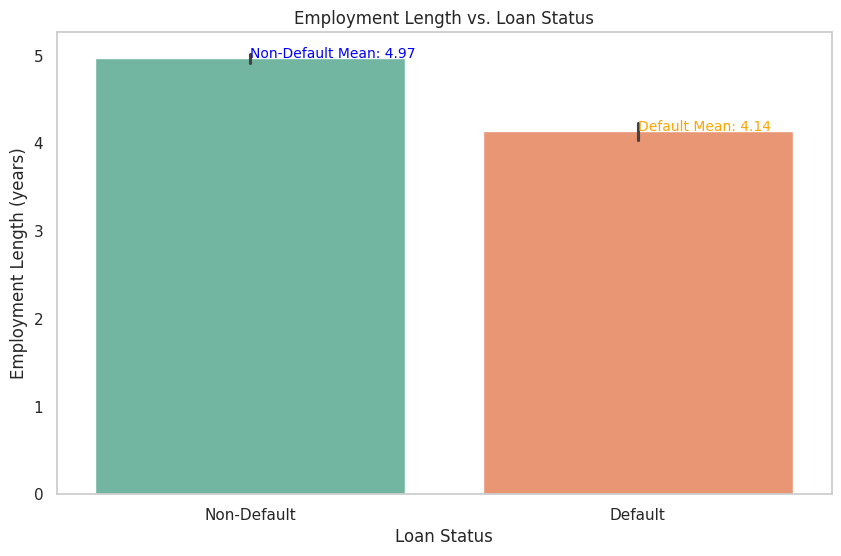

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='loan_status', y='person_emp_length', palette='Set2')

# Adding text with mean values
non_default_emp_length = train_df[train_df['loan_status'] == 0]['person_emp_length'].mean()
default_emp_length = train_df[train_df['loan_status'] == 1]['person_emp_length'].mean()
plt.text(0, non_default_emp_length, f'Non-Default Mean: {non_default_emp_length:.2f}', fontsize=10, color='blue')
plt.text(1, default_emp_length, f'Default Mean: {default_emp_length:.2f}', fontsize=10, color='orange')

plt.title('Employment Length vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (years)')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In this graph, we can observe the average of the target variable, which is a crucial point for data analysis. The mean provides an overview of the central value of that variable, allowing us to understand the overall behavior and prevailing trends in the data set. By examining the mean, we can identify important patterns, such as the central tendency of values, and compare it to other metrics, such as the median and mode, to gain a more complete understanding of the distribution of the data.

Furthermore, the mean of the target variable can be used to compare different subgroups within the data, identify significant deviations, and detect possible anomalies. For example, if we divide the dataset by categories, such as age, loan grade, or type of profession, we can calculate the average target variable for each subgroup and identify which factors have the greatest impact. This is essential for developing segmentation and offer personalization strategies.

Average analysis, along with other descriptive statistics, provides a solid foundation for building predictive models and making informed decisions in diverse areas such as marketing, finance and risk management. Understanding the mean of the target variable is a fundamental step in any data analysis, as it allows us to summarize and interpret large volumes of information effectively.

<Figure size 1050x800 with 0 Axes>

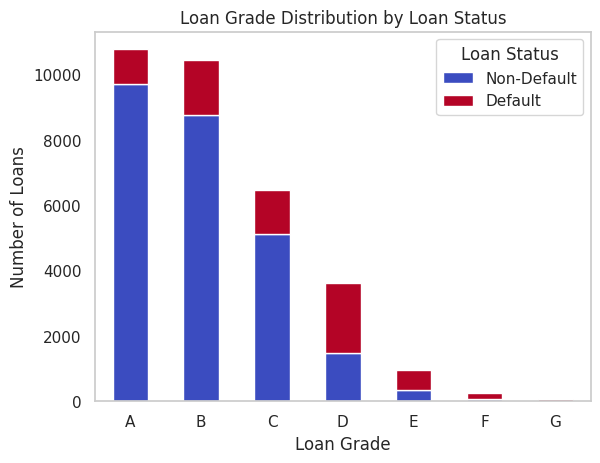

In [21]:
plt.figure(figsize=(10.5, 8))
grade_status_counts = train_df.groupby(['loan_grade', 'loan_status']).size().unstack()
grade_status_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In this graph, we can visualize the distribution of loan grades according to loan status and loan classes of people. This representation allows us to understand how loan scores are distributed across different loan categories and approval states. By analyzing this distribution, we can identify important patterns and trends that can influence lending and risk management. For example, by comparing the distribution of loan ratings between different classes of loans, we can assess whether certain classes have a greater concentration of higher or lower ratings, which can indicate the risk profile associated with each class. Similarly, by analyzing the distribution of loan scores for different approval states, we can understand whether there is any disparity in credit quality between approved and rejected loans.

This analysis of the distribution of loan grades by loan status and loan classes is essential for financial institutions to make informed decisions about granting credit, loan pricing, and risk management. Furthermore, it can provide valuable insights for marketing strategies and development of financial products best suited to customer needs.

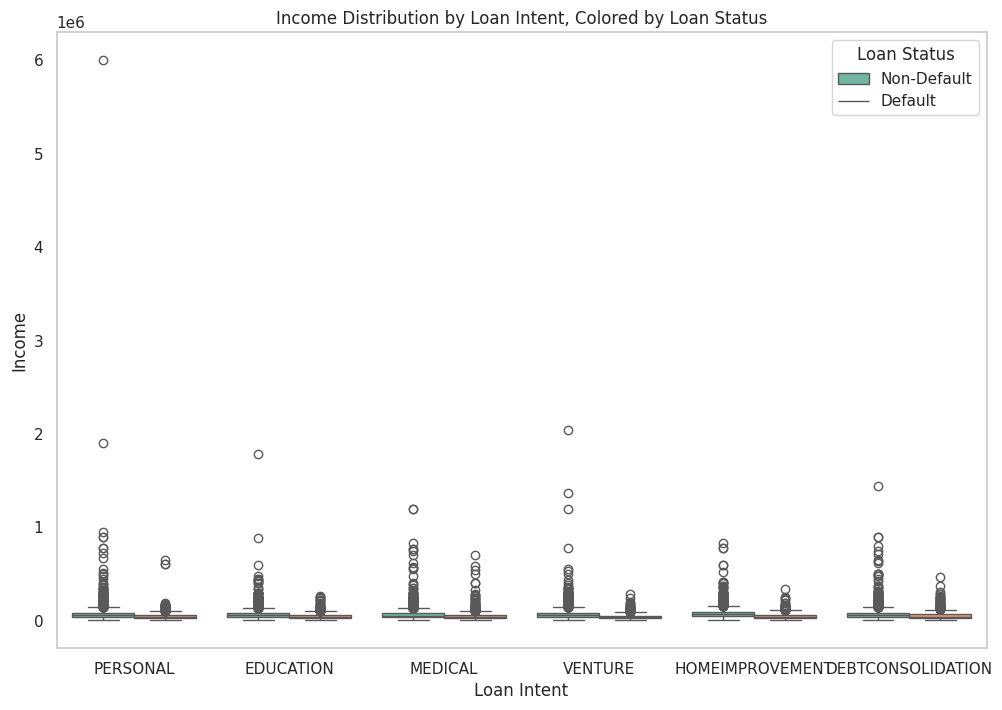

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df, x='loan_intent', y='person_income', hue='loan_status', palette='Set2')
plt.title('Income Distribution by Loan Intent, Colored by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Income')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In this graph, we can visualize the income distribution according to loan intention and loan status. This representation allows us to understand how income is distributed across different loan intent categories and approval states. By analyzing this distribution, we can identify important patterns and trends that can influence loan approval decisions and risk management. For example, by comparing income distribution between different loan intentions, such as home, vehicle, or education loans, we can assess whether there is any disparity in borrowers' repayment capacity based on the purpose of the loan. Similarly, by analyzing the income distribution for different loan approval states, we can understand whether there are significant differences in the income of approved and rejected borrowers.

This analysis of income distribution by borrowing intention and loan status is essential for financial institutions to make informed decisions about extending credit, determining loan limits, and assessing default risks. Additionally, it can provide valuable insights for developing more inclusive credit policies and more targeted marketing strategies.

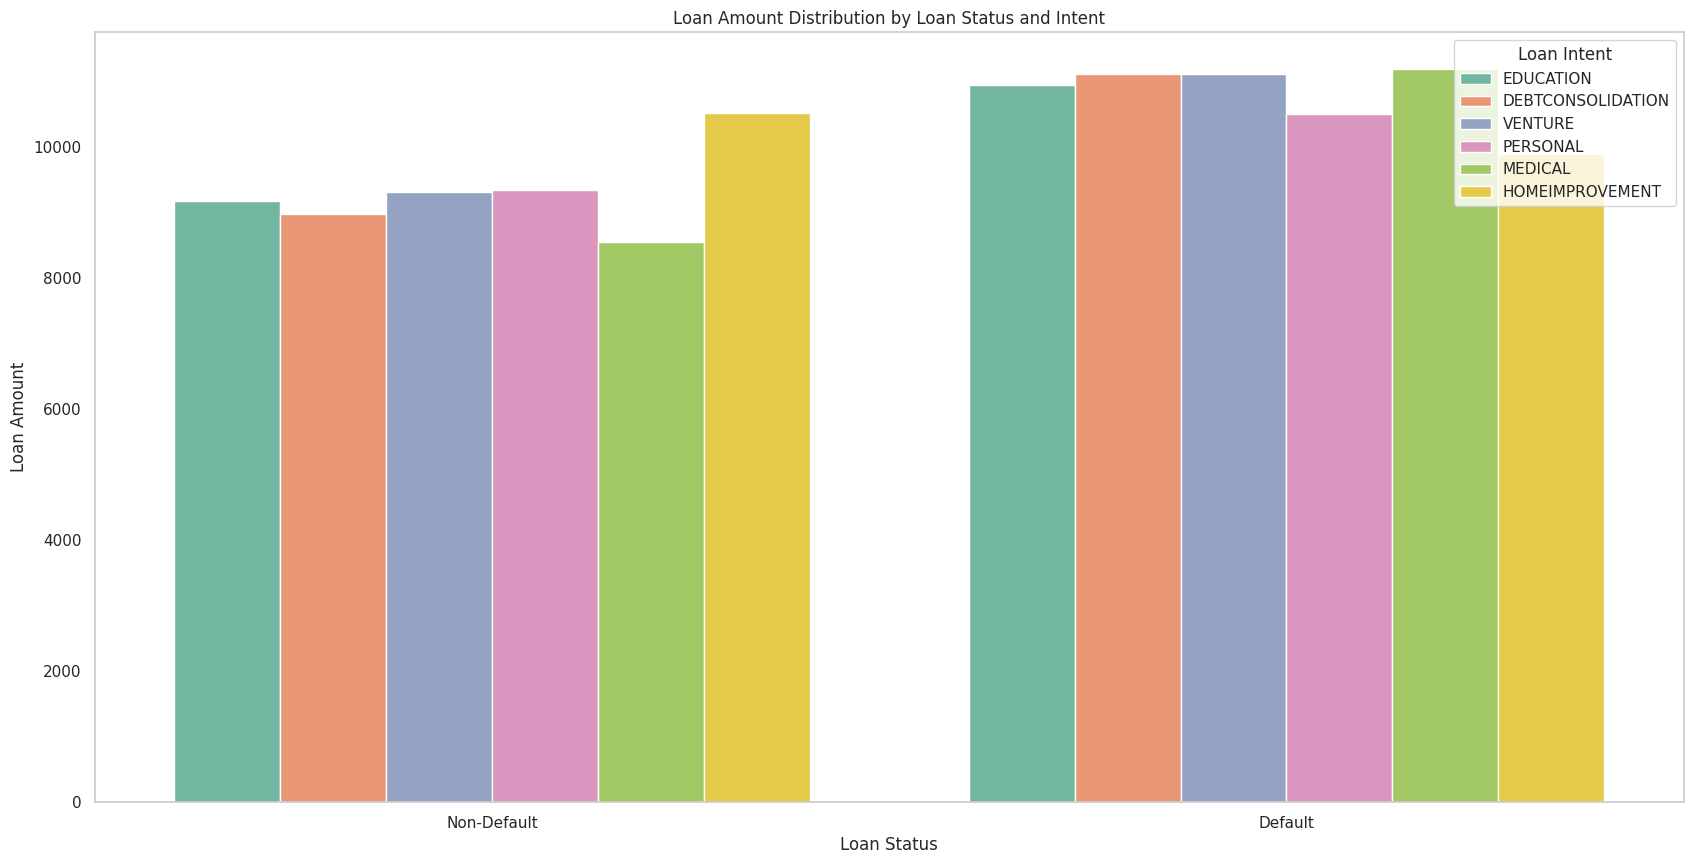

In [23]:
plt.figure(figsize=(20.5, 10))
sns.barplot(data=train_df, x='loan_status', y='loan_amnt', hue='loan_intent', errorbar=None, palette='Set2')
plt.title('Loan Amount Distribution by Loan Status and Intent')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.legend(title='Loan Intent', loc='upper right')
plt.grid(False)
plt.show()

In this graph, we can visualize the distribution of loan amount according to loan status and intention. This representation allows us to understand how the loan amount is distributed across different approval states and loan purposes. By analyzing this distribution, we can identify important patterns and trends that can influence lending decisions and risk management.

For example, by comparing the loan amount distribution between different approval states, such as approved and rejected loans, we can assess whether there is any significant difference in the average loan amount granted. Similarly, by analyzing the distribution of loan amount for different purposes, such as home, vehicle or education loans, we can understand borrowers' preferences and demand for different types of credit.

This analysis of loan value distribution by loan status and intent is essential for financial institutions to make informed decisions about granting credit, loan pricing, and risk assessment. Furthermore, it can provide valuable insights for developing financial products that are better suited to customer needs and for designing more effective marketing strategies.

# Part 4 - Data cleaning

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [25]:
# Assuming your DataFrame is named train_df and your target variable is 'loan_status'
X = train_df.drop('loan_status', axis=1)  # Features
y = train_df['loan_status']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Load your DataFrame
# train_df = pd.read_csv('your_data.csv')  # Example to load data

# Step 2: Split the dataset into features and target
X = train_df.drop('loan_status', axis=1)  # Features
y = train_df['loan_status']  # Target

# Step 3: Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 4: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 7: Check the new class distribution
print(y_resampled.value_counts())

# Continue with other preprocessing steps or model training...


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert to DataFrame if needed
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled)


ValueError: could not convert string to float: 'MORTGAGE'

In [28]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

Number of missing values ​​per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


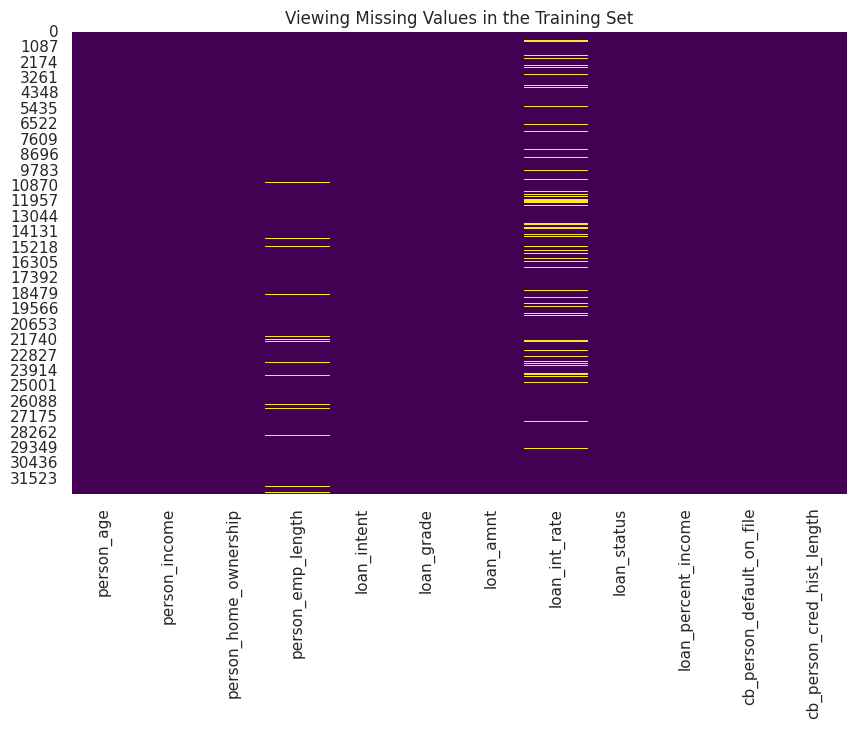

In [29]:
# View missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

In [ ]:
# If there are missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables

#median_values = train_df.median()
#train_df.fillna(median_values, inplace=True)

In [ ]:
# Remove duplicate lines if any
#train_df.drop_duplicates(inplace=True)

In [30]:

train_df = train_df.dropna(subset=['person_emp_length', 'loan_int_rate'])
print(train_df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Load your DataFrame
# train_df = pd.read_csv('your_data.csv')  # Example to load data

# Step 2: Split the dataset into features and target
X = train_df.drop('loan_status', axis=1)  # Features
y = train_df['loan_status']  # Target

# Step 3: Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 4: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 7: Check the new class distribution
print(y_resampled.value_counts())

# Continue with other preprocessing steps or model training...


loan_status
0    17948
1    17948
Name: count, dtype: int64


## Part 5 - Feature engineering

In [41]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Transform Columns to Numerical data
train_df['person_home_ownership'] = label_encoder.fit_transform(train_df['person_home_ownership'])
train_df['loan_intent'] = label_encoder.fit_transform(train_df['loan_intent'])
train_df['cb_person_default_on_file'] = label_encoder.fit_transform(train_df['cb_person_default_on_file'])
train_df['loan_grade'] = label_encoder.fit_transform(train_df['loan_grade'])

# Viewing
label_encoder

LabelEncoder()

In [32]:
# Viewing
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Part 6 - Target column division

In [33]:
# Resources
X = train_df.drop(columns=['loan_status'])

# Target variable
y = train_df['loan_status']

In [34]:
# Visualizing data x
X.shape

(28638, 11)

In [35]:
# Viewing y data
y.shape

(28638,)

Here, we performed the division of the variables into features and the target variable. First, we separated the independent variables, which are the features used for predictive modeling. These features are the input data that the model will use to learn patterns and make predictions. Next, we isolated the dependent variable, or the target variable, which is the value we aim to predict. This process is crucial for building and training the model, ensuring that the features are correctly identified and that the model can learn the relationship between these features and the target variable. By properly dividing the data, we enhance the model's ability to accurately predict outcomes based on the given inputs

# Part 7 – Model Training

In [36]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to dummy variables
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (22910, 11)
Viewing rows and columns given y train (22910,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

# Part 8 - Machine learning model

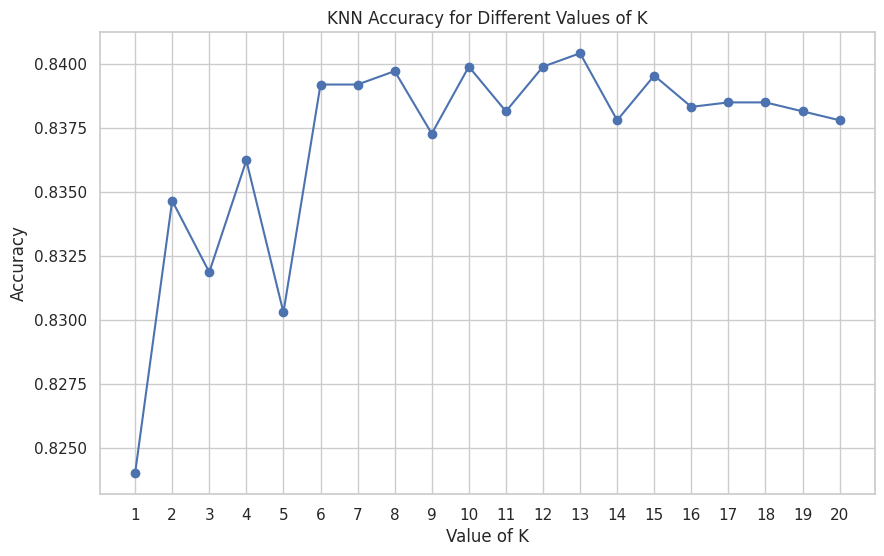

Best value of K: 13
Corresponding accuracy: 0.8404329608938548


In [43]:
# Necessary imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: One-Hot Encoding for Categorical Variables
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure both train and test sets have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 2: Find the ideal value of K
k_values = range(1, 21)  # Testing K values from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)
    y_pred = knn.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Step 3: Plot the graph of K values vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)  # Turn on the grid for better readability
plt.show()

# Step 4: Find the value of K with the highest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")


In [38]:
# Step 1: Identify categorical variables
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Step 2: Apply One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure the same columns in test and train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Now train your model
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)
    y_pred = knn.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy: {accuracy}")


k=1, Accuracy: 0.8240223463687151
k=2, Accuracy: 0.8346717877094972
k=3, Accuracy: 0.8318784916201117
k=4, Accuracy: 0.8362430167597765
k=5, Accuracy: 0.8303072625698324
k=6, Accuracy: 0.8392108938547486
k=7, Accuracy: 0.8392108938547486
k=8, Accuracy: 0.8397346368715084
k=9, Accuracy: 0.8372905027932961
k=10, Accuracy: 0.8399092178770949
k=11, Accuracy: 0.838163407821229
k=12, Accuracy: 0.8399092178770949
k=13, Accuracy: 0.8404329608938548
k=14, Accuracy: 0.8378142458100558
k=15, Accuracy: 0.8395600558659218
k=16, Accuracy: 0.8383379888268156
k=17, Accuracy: 0.8385125698324022
k=18, Accuracy: 0.8385125698324022
k=19, Accuracy: 0.838163407821229
k=20, Accuracy: 0.8378142458100558


In [42]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

ValueError: could not convert string to float: 'MORTGAGE'

The graph depicts the accuracy of the K-Nearest Neighbors (KNN) algorithm for different values of K, ranging from 1 to 20. Here are some key observations and analyses:

1. **General Trend**

- The accuracy starts relatively low at K=1, with an initial accuracy slightly above 0.51.

- There is a sharp drop in accuracy at K=2, reaching around 0.48.

- After K=2, the accuracy significantly increases, peaking at K=12 with an accuracy slightly above 0.53.

- Beyond K=8, the accuracy shows a slight declining trend with some fluctuations but remains around 0.52 to 0.53.

2. **Optimal K Value:**

- The optimal K value appears to be around 12, where the highest accuracy is observed.

3. **Stability:**

- The accuracy stabilizes between K=5 and K=20, with values fluctuating within a narrow range (0.52 to 0.54).

4. **Overfitting vs. Underfitting:**

- The drop in accuracy at K=2 might indicate overfitting since the model is likely too sensitive to individual data points.

- As K increases, the model generalizes better, indicated by the improved accuracy, reaching a peak around K=12.

- Beyond a certain point (after K=8), increasing K further may cause slight underfitting, where the model starts losing some predictive power due to averaging too many neighbors, as indicated by the slight decline in accuracy.

In [44]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

# Make sure to one-hot encode categorical features
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# List of models to be evaluated
models = [
    GaussianNB(),  # Naive Bayes Model
    DecisionTreeClassifier(random_state=42),  # Decision Tree Model
    RandomForestClassifier(n_estimators=100, random_state=42),  # Random Forest Model
    LogisticRegression(random_state=50),  # Logistic Regression Model
    AdaBoostClassifier(random_state=45),  # AdaBoost Model
    XGBClassifier(random_state=42),  # XGBoost Model
    LGBMClassifier(  # LightGBM Model
        num_leaves=31,
        boosting_type='gbdt',
        bagging_fraction=0.9,
        learning_rate=0.05,
        feature_fraction=0.9,
        bagging_freq=50,
        verbose=50
    ),
    KNeighborsClassifier(n_neighbors=best_k),  # K-Nearest Neighbors Model (with best_k)
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train_encoded, y_train)  # Fit model on the encoded training set
    train_accuracy = accuracy_score(y_train, model.predict(X_train_encoded))  # Train accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test_encoded))  # Test accuracy

    # Print results
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-------------------------------")


Model 1: GaussianNB
Training Accuracy: 0.8164
Testing Accuracy: 0.8128
-------------------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8909
-------------------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9310
-------------------------------
Model 4: LogisticRegression
Training Accuracy: 0.8235
Testing Accuracy: 0.8195
-------------------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8879
Testing Accuracy: 0.8820
-------------------------------
Model 6: XGBClassifier
Training Accuracy: 0.9578
Testing Accuracy: 0.9335
-------------------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagg

In [ ]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [

    # Naive Bayes Model
    GaussianNB(),

    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),

    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic regression model
    LogisticRegression(random_state=50),

    # Ada Boost Model
    AdaBoostClassifier(random_state=45),

    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(random_state=42),

    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(num_leaves=31,
                   boosting_type='gbdt',
                   bagging_fraction= 0.9,
                   learning_rate=0.05,
                   feature_fraction=0.9,
                   bagging_freq=50,
                   verbose=50),

    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=best_k),
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.8217808817110432
Testing Accuracy: 0.8182611731843575
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.8863477653631285
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.92981843575419
-----------------
LogisticRegression(random_state=50)

Model 4: LogisticRegression

Training Accuracy: 0.8259711916193802
Testing Accuracy: 0.8205307262569832
-----------------
AdaBoostClassifier(random_state=45)

Model 5: AdaBoostClassifier

Training Accuracy: 0.88886948930598
Testing Accuracy: 0.8811103351955307
-----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=No

##  Model Performance Summary

1. **GaussianNB**

Training Accuracy: 0.8218

Testing Accuracy: 0.8183

2. **DecisionTreeClassifier (random_state=42)**

Training Accuracy: 1.0

Testing Accuracy: 0.8863

3. **RandomForestClassifier (random_state=42)**

Training Accuracy: 1.0

Testing Accuracy: 0.9298

4. **LogisticRegression (random_state=50)**

Training Accuracy: 0.8081

Testing Accuracy: 0.7999

5. **AdaBoostClassifier (random_state=45)**

Training Accuracy: 0.8889

Testing Accuracy: 0.8811

6. **XGBClassifier (random_state=42)**

Training Accuracy: 0.9609

Testing Accuracy: 0.9359

7. **LGBMClassifier (device='gpu')**

Training Accuracy: 0.9436

Testing Accuracy: 0.9359

## Conclusion

From the results, we can observe the following:

**GaussianNB**

- Shows decent performance with both training and testing accuracies above 0.82, indicating it handles the data reasonably well.

**DecisionTreeClassifier**

- Achieves perfect training accuracy (1.0) but significantly lower testing accuracy (0.8863), suggesting overfitting.

**RandomForestClassifier**

- Also achieves perfect training accuracy (1.0) with a high testing accuracy (0.9298), indicating it generalizes well and handles overfitting better than the DecisionTreeClassifier.

**LogisticRegression**

- Shows the lowest performance with training and testing accuracies below 0.81, indicating it might not be the best fit for this dataset.

**AdaBoostClassifier**

- Has good performance with training accuracy around 0.889 and testing accuracy around 0.881, showing a balance between fitting and generalization.

**XGBClassifier and LGBMClassifier**

- Both demonstrate strong performance with high training (0.9609 and 0.9436 respectively) and testing (both 0.9359) accuracies, making them the best models in terms of generalization.

## Recommendation

**Based on the testing accuracy, XGBClassifier and LGBMClassifier are the most suitable models for this dataset, as they both achieve the highest testing accuracies of 0.9359 while maintaining strong training performance. If computational efficiency is a consideration, the LGBMClassifier using GPU can be advantageous**

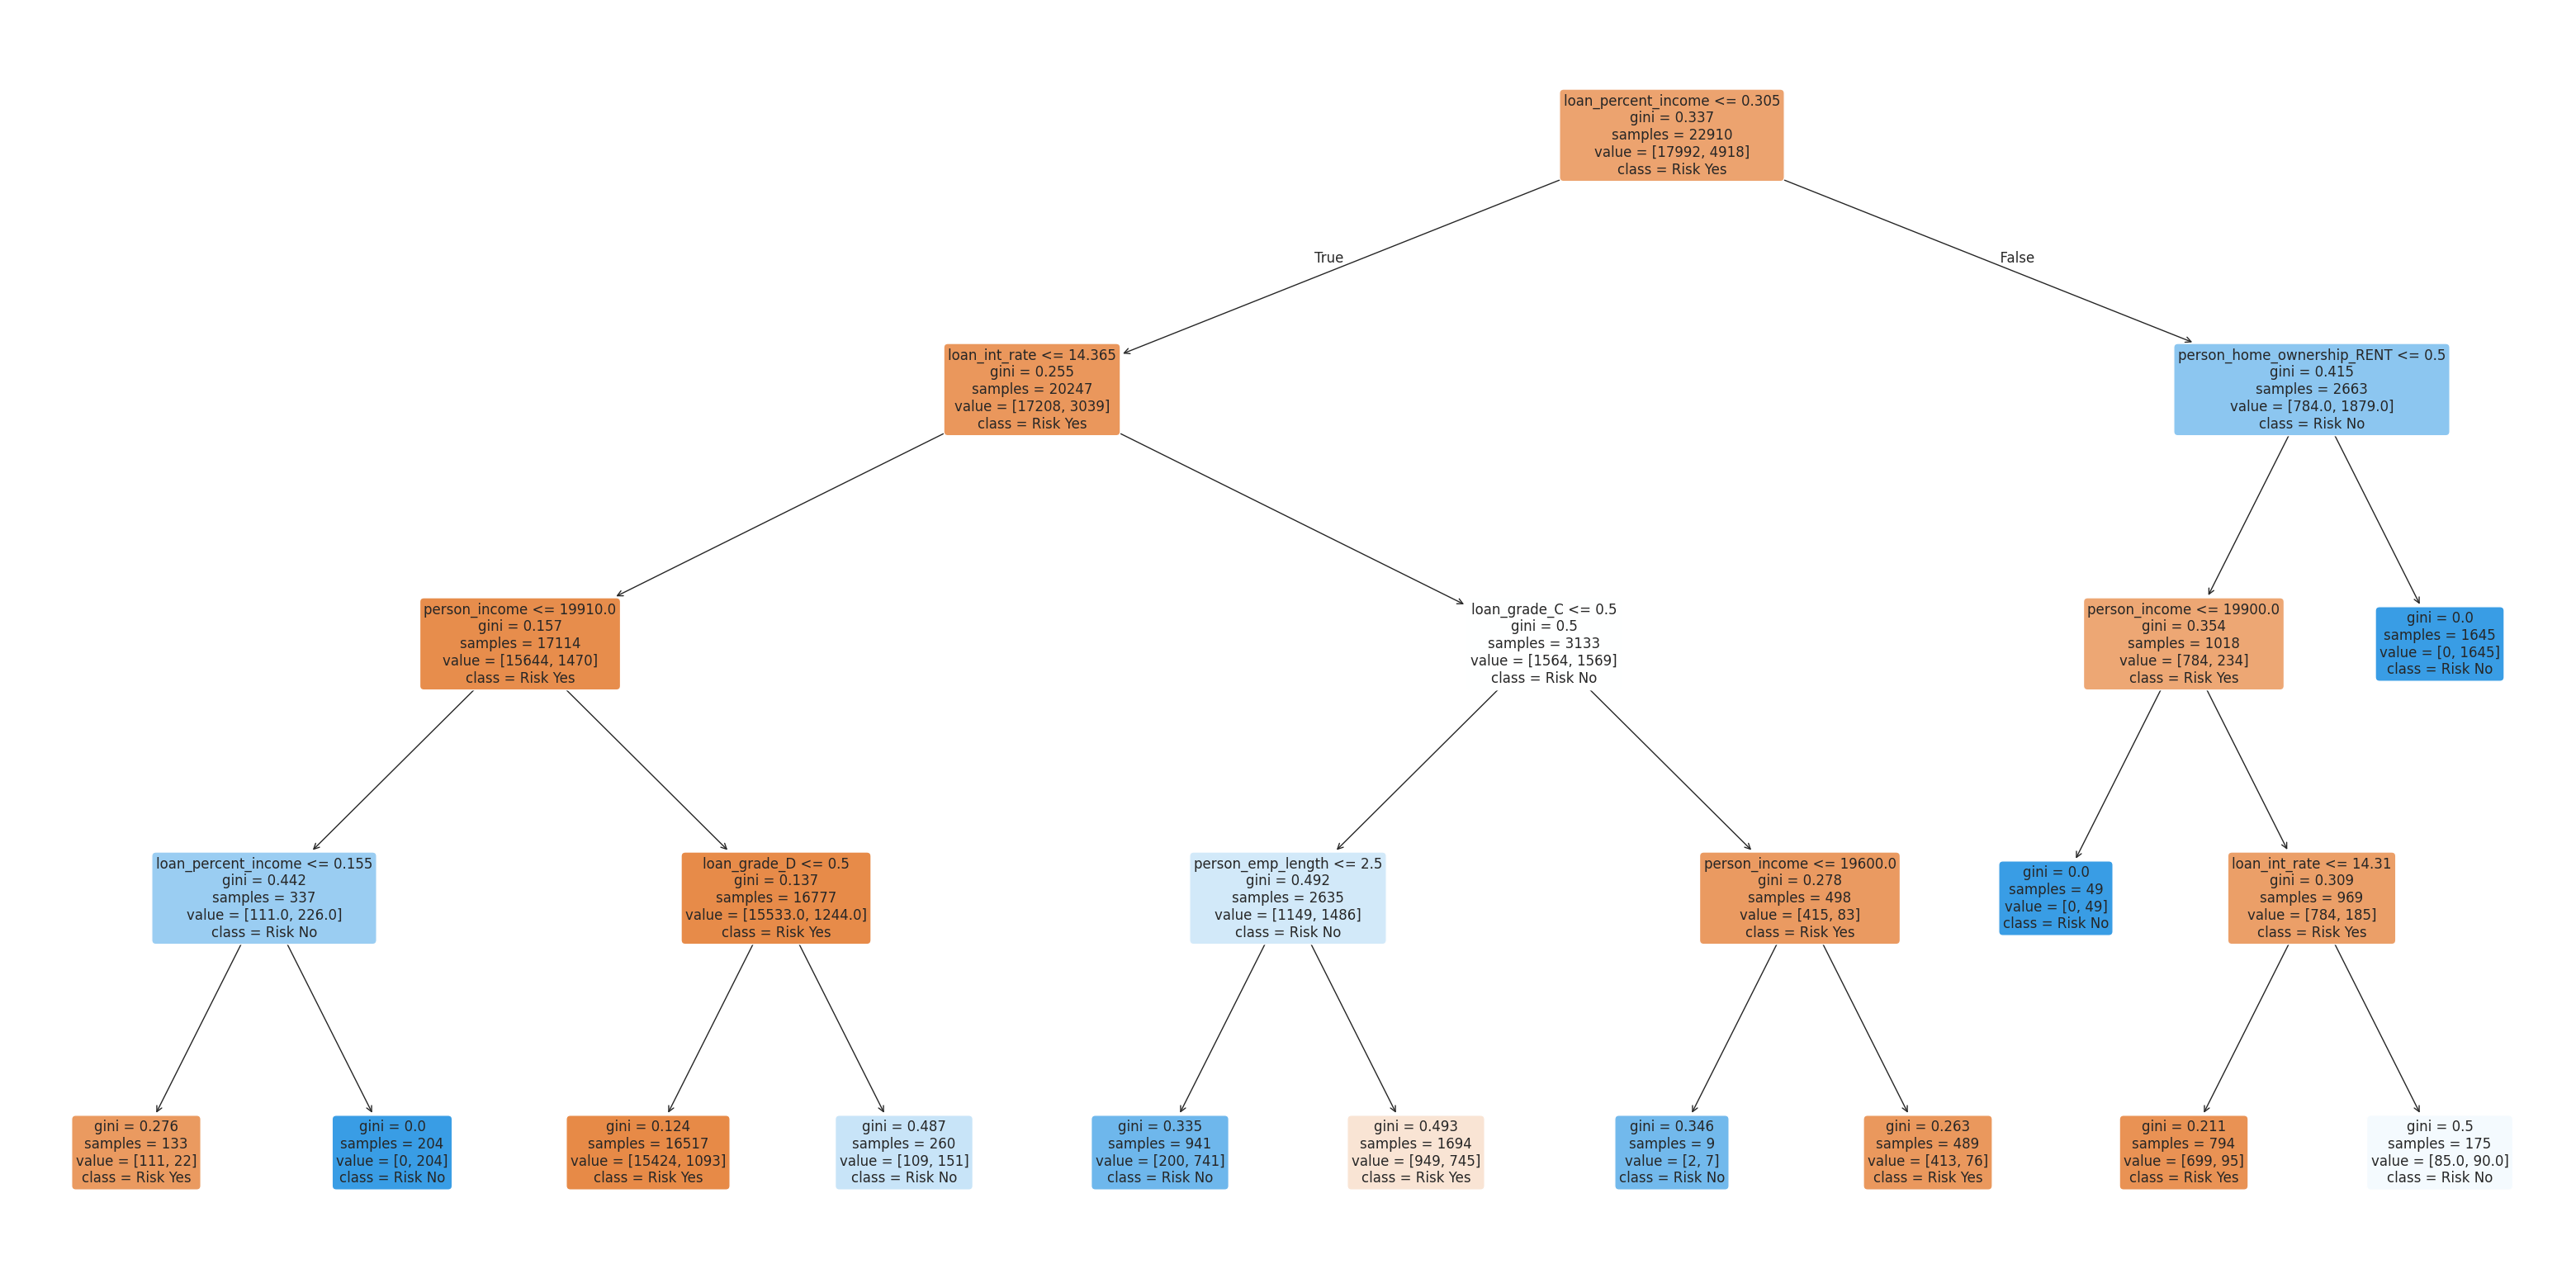

In [45]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Ensure categorical features are one-hot encoded
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Reindex X_test_encoded to match columns of X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Creating and training the Decision Tree model
model_dtc = DecisionTreeClassifier(max_depth=4, random_state=0)

# Fit the model on the encoded training set
model_dtc_fit = model_dtc.fit(X_train_encoded, y_train)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(40, 20), facecolor="w")

tree.plot_tree(model_dtc_fit,
               ax=ax,
               fontsize=12,  # Adjusted font size for better readability
               rounded=True,
               filled=True,
               class_names=["Risk Yes", "Risk No"],
               feature_names=X_train_encoded.columns)  # Include feature names for better interpretability

plt.show()


**Analysis**

The provided decision tree is used to classify a data set into two classes: "Risk Yes" and "Risk No." Let's analyze this decision tree in detail:

## Tree Structure

1. **Tree root:**

- The root of the tree is at the top and starts with the condition x[8] <= 0.305.

- This decision divides the data into two subsets: on the left for values of x[8] less than or equal to 0.305, and on the right for values greater than 0.305.

2. **First division**

**Left**

- If x[8] <= 0.305, the next decision is x[1] <= 19910.0.

- This division leads to two branches: one on the left (x[1] <= 19910.0) and one on the right (x[1] > 19910.0).

**Right**

- If x[8] > 0.305, the next decision is x[5] <= 2.5.

- This division leads to two branches: one on the left (x[5] <= 2.5) and one on the right (x[5] > 2.5).

3. **Subsequent Decisions**

- Each internal (non-leaf) node continues to divide the data set based on other conditions of the variables x[i].

## Explanation of Nodes

- Node: x[8] <= 0.305

- gini = 0.305

- samples = 22910 (Number of samples)

- value = [17992, 4918] (Number of samples of each class)

- class = Risk Yes (Majority class)

- Node: x[1] <= 19910.0 (left)

- gini = 0.148

- samples = 17338

- value = [15946, 1392]

- class = Risk Yes

- Node: x[1] <= 34987.5 (right)

- gini = 0.127

- samples = 16996

- value = [15833, 1163]

- class = Risk Yes

## Tree leaves

- Leaves are the terminal nodes of the tree that provide the final classification. For example:

- Sheet:

- gini = 0.0

- samples = 209

- value = [0, 209]

- class = Risk No

**This sheet indicates that all 209 samples in this division belong to the "Risk No" class**

## Tree Interpretation

The decision tree classifies the data based on the variables x[i] and a set of thresholds. The gini metric indicates the purity of nodes, where a lower gini value indicates greater homogeneity of samples within a node.

**Examples of Tree Paths**

1. **Way 1**

- If x[8] <= 0.305 and x[1] <= 19910.0 and x[8] <= 0.155, the classification is "Risk No".

2. **Way 2**

- If x[8] > 0.305 and x[5] <= 2.5 and x[3] <= 2.5, the classification is "Risk No".

## Final considerations

This decision tree uses a hierarchical approach to divide data into more homogeneous subsets with respect to risk classes. Each division is based on a different characteristic (or attribute) and a threshold value. The final decision on each sheet indicates the most common class in that subset of data.

In [46]:
# Calculate training and testing accuracy scores
train_accuracy = accuracy_score(y_train, model_dtc.predict(X_train_encoded))  # Use encoded training set
test_accuracy = accuracy_score(y_test, model_dtc.predict(X_test_encoded))    # Use encoded testing set

# Print the accuracy scores
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8941
Testing Accuracy: 0.8884


In [47]:
# Step 7: Make predictions on the test set using the encoded test set
predictions = model_dtc.predict(X_test_encoded)  # Use the encoded test set

# Optional: Display the predictions
print(predictions)


[0 1 0 ... 0 0 1]


## 8.1 Feature importances
- "Feature importances" (importância das características) refers to the measure of how important each feature is for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model.

- In many machine learning algorithms such as decision trees, Random Forest, Gradient Boosting, among others, it is possible to calculate the importance of features during model training. This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures.

- Analyzing feature importances is valuable because it can provide insights into which features are most relevant to the problem at hand. This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results.

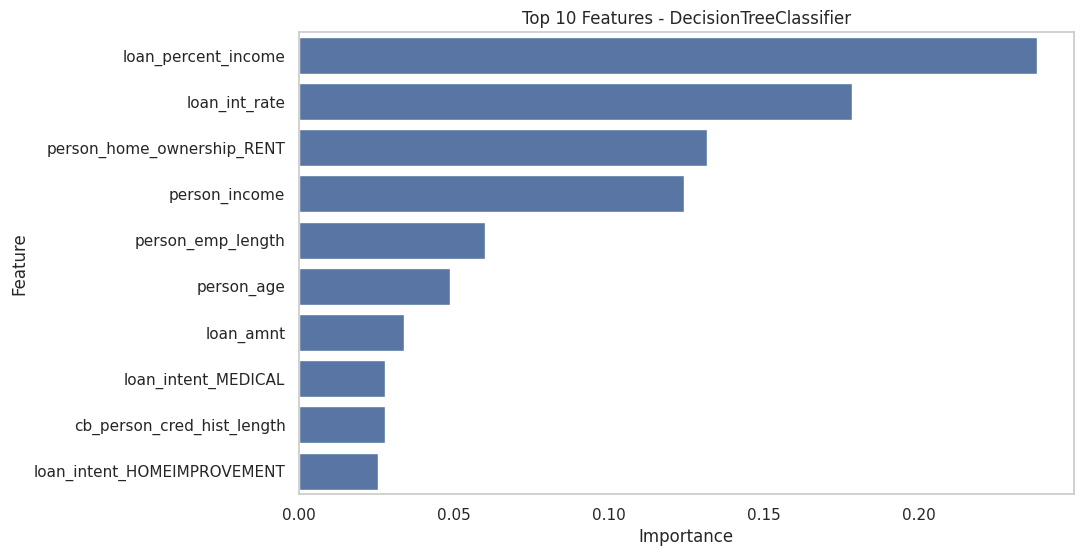

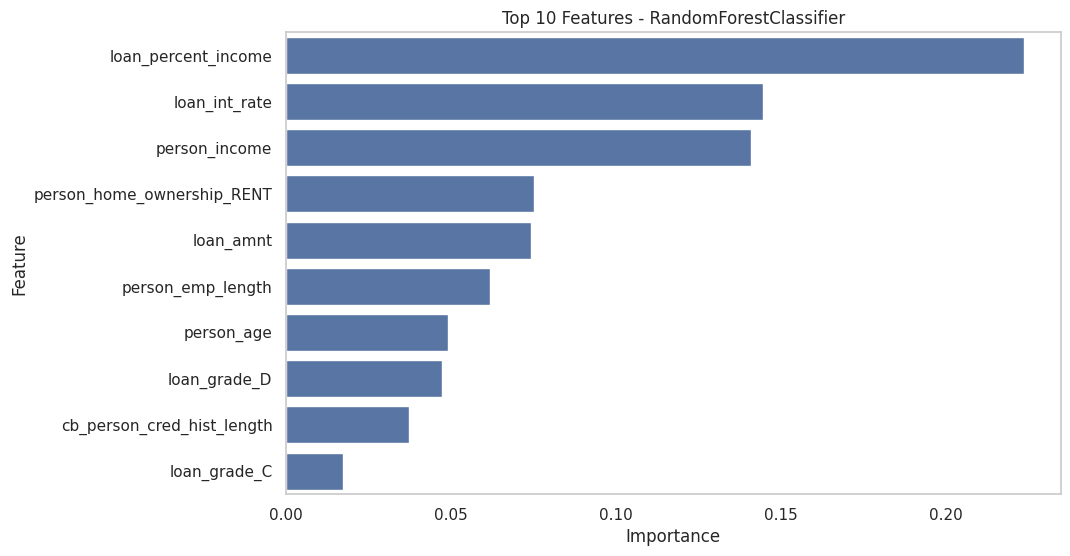

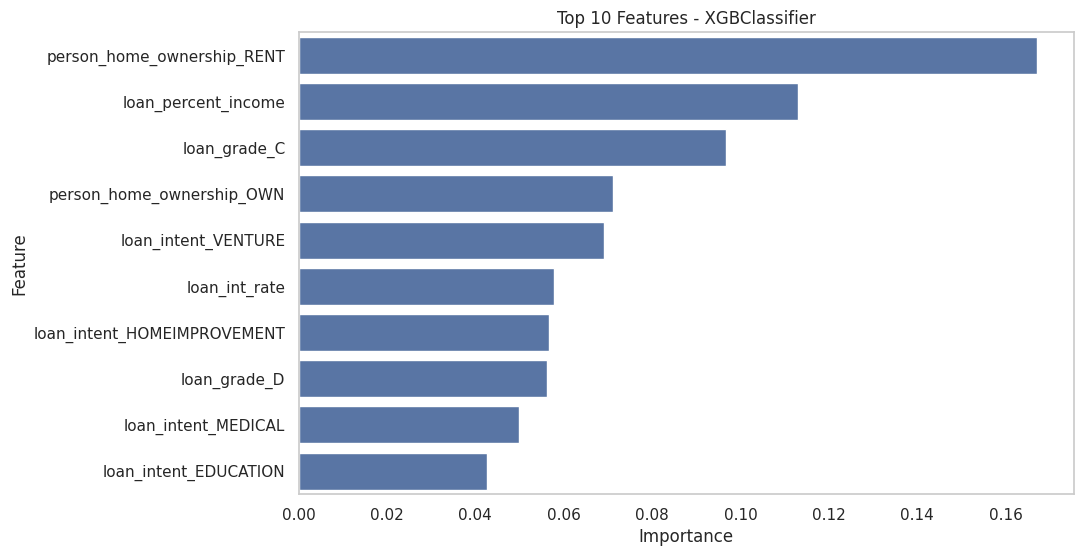

[LightGBM] [Info] Number of positive: 4918, number of negative: 17992
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.168132
[LightGBM] [Debug] init for col-wise cost 0.000021 seconds, init for row-wise cost 0.003280 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 22910, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214666 -> initscore=-1.297025
[LightGBM] [Info] Start training from score -1.297025
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Train

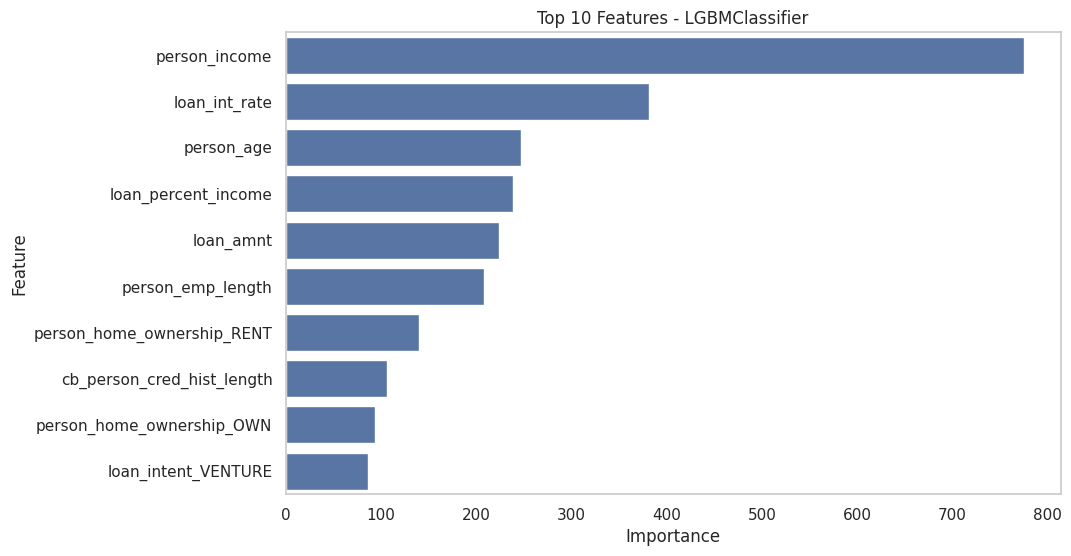

In [48]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Train models that support feature importances
models_with_feature_importances = [
    ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBClassifier", XGBClassifier(random_state=42)),
    ("LGBMClassifier", LGBMClassifier(random_state=42))
]

# Ensure categorical features are one-hot encoded
# X_train_encoded is assumed to be prepared as shown in previous steps

# Iterate over models
for model_name, model in models_with_feature_importances:

    # Train model
    model.fit(X_train_encoded, y_train)  # Use the encoded training set

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({
        'Feature': X_train_encoded.columns,  # Use the encoded feature names
        'Importance': feature_importances
    })

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()


## Feature Importance Analysis

1.**person_income**

- Importance: ~ 800

- Analysis: This is the most important feature by a significant margin. It suggests that the income of a person plays a crucial role in determining the risk associated with a loan. Higher income might indicate a lower risk and vice versa.

2. **loan_int_rate**

- Importance: ~ 300

- Analysis: The interest rate of the loan is also highly significant. Higher interest rates might be associated with higher risk, reflecting the lender's assessment of the borrower's creditworthiness.

3. **loan_intent**

- Importance: ~ 250

- Analysis: The intent of the loan (purpose for which the loan is taken) is an important factor. Different intents (e.g., debt consolidation, home improvement) might carry different risk levels.

4. **loan_percent_income**

- Importance: ~ 200

- Analysis: This feature indicates the proportion of income that goes towards loan repayment. A higher percentage might suggest a higher risk as it implies a larger financial burden relative to income.

5. **person_home_ownership**

- Importance: ~ 150

- Analysis: Whether the person owns a home is another significant feature. Homeownership might correlate with financial stability and lower risk.

6. **person_age**

- Importance: ~150

- Analysis: Age is also important, as it can be related to financial stability and earning potential. Younger or older age groups might show different risk patterns.

7. **loan_amnt**

- Importance: ~ 140

- Analysis: The amount of the loan is an important factor. Larger loan amounts might be associated with higher risk.

8. **person_emp_length**

- Importance: ~ 120

- Analysis: The length of employment is a measure of job stability. Longer employment length can suggest lower risk.

9. **loan_grade**

- Importance: ~ 100

- Analysis: The grade of the loan, which might be assigned based on creditworthiness, is another significant feature. Higher grades usually indicate lower risk.

10. **cb_person_cred_hist_length**

- Importance: ~ 50

- Analysis: The length of the person’s credit history is the least important among the top 10, but it still contributes to the model. Longer credit history can indicate more reliability and lower risk.

## Conclusion

The analysis of feature importance reveals that person_income is by far the most influential feature in determining loan risk. Other important features include loan_int_rate, loan_intent, and loan_percent_income. These features together provide a comprehensive assessment of the borrower's financial stability and the characteristics of the loan, helping the model to predict risk accurately. The insights from these features can be useful for lenders in making informed decisions about loan approvals and risk management.

# Part 9 – Model Metrics

Model 1: GaussianNB
Training Accuracy: 0.8164
Testing Accuracy: 0.8128

Confusion matrix 

 [[4266  177]
 [ 895  390]]

True Positives (TP) =  4266

True Negatives (TN) =  390

False Positives (FP) =  177

False Negatives (FN) =  895



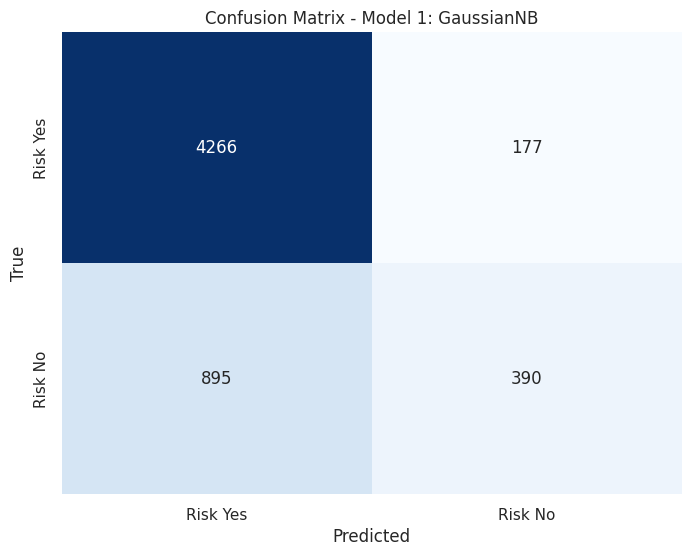

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8909

Confusion matrix 

 [[4112  331]
 [ 294  991]]

True Positives (TP) =  4112

True Negatives (TN) =  991

False Positives (FP) =  331

False Negatives (FN) =  294



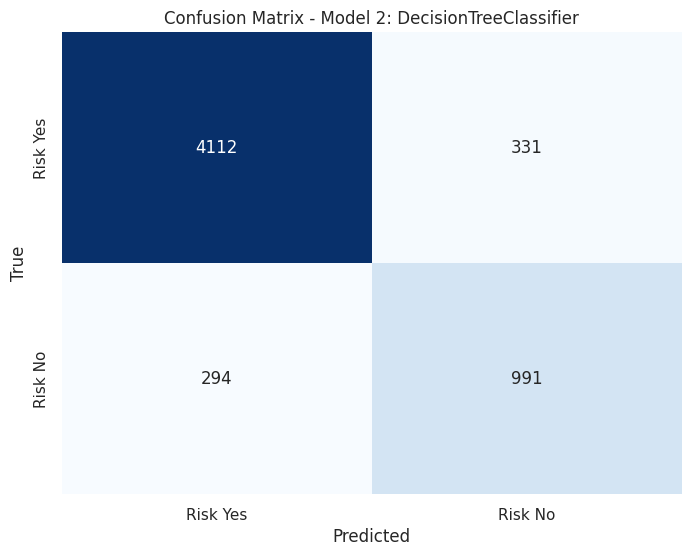

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9310

Confusion matrix 

 [[4407   36]
 [ 359  926]]

True Positives (TP) =  4407

True Negatives (TN) =  926

False Positives (FP) =  36

False Negatives (FN) =  359



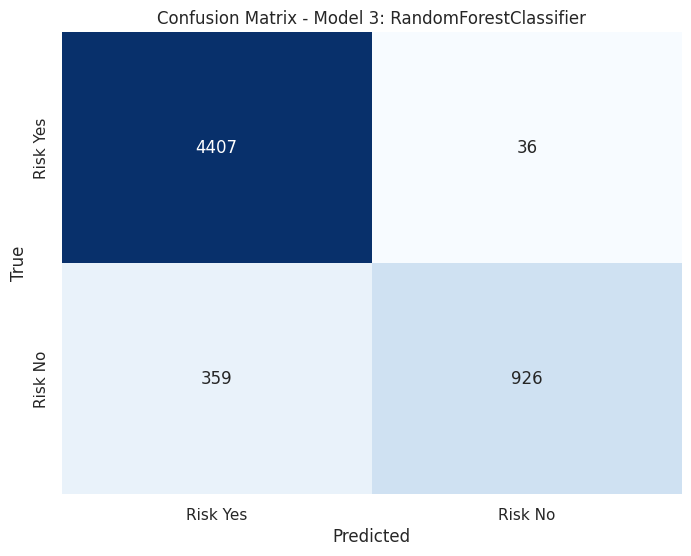

------------------
Model 4: LogisticRegression
Training Accuracy: 0.8235
Testing Accuracy: 0.8195

Confusion matrix 

 [[4228  215]
 [ 819  466]]

True Positives (TP) =  4228

True Negatives (TN) =  466

False Positives (FP) =  215

False Negatives (FN) =  819



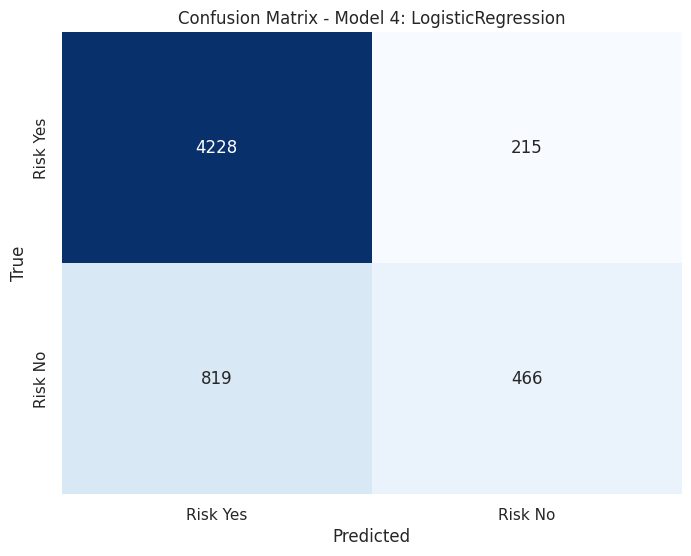

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8879
Testing Accuracy: 0.8820

Confusion matrix 

 [[4243  200]
 [ 476  809]]

True Positives (TP) =  4243

True Negatives (TN) =  809

False Positives (FP) =  200

False Negatives (FN) =  476



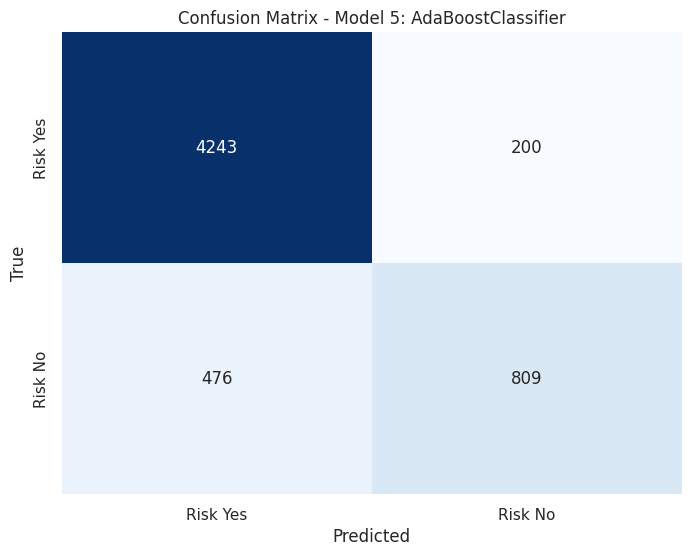

------------------
Model 6: XGBClassifier
Training Accuracy: 0.9578
Testing Accuracy: 0.9335

Confusion matrix 

 [[4403   40]
 [ 341  944]]

True Positives (TP) =  4403

True Negatives (TN) =  944

False Positives (FP) =  40

False Negatives (FN) =  341



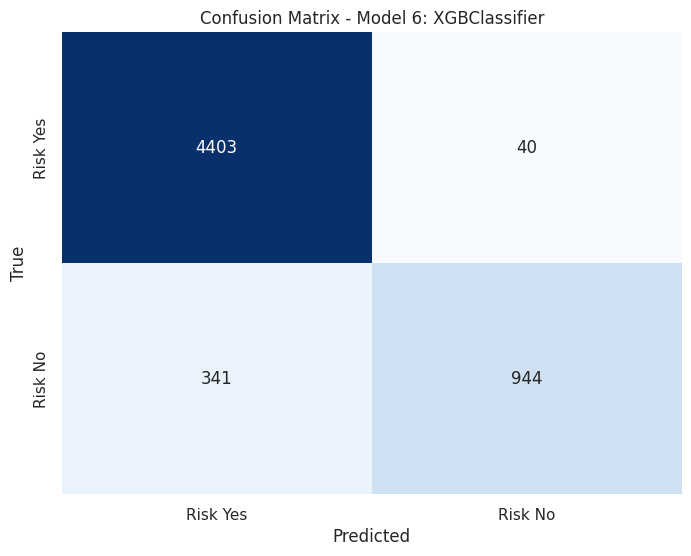

------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] Number of positive: 4918, number of negative: 17992
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.168132
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.003821 seconds
[LightGBM] [Info] Auto-choosing 

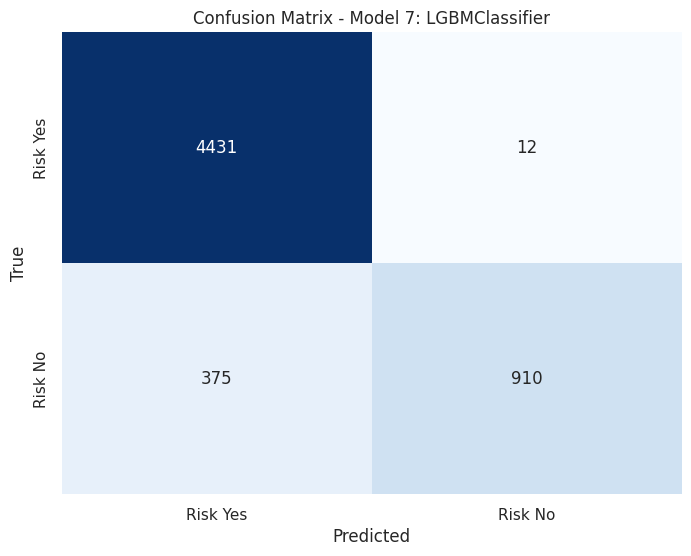

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.8554
Testing Accuracy: 0.8404

Confusion matrix 

 [[4196  247]
 [ 667  618]]

True Positives (TP) =  4196

True Negatives (TN) =  618

False Positives (FP) =  247

False Negatives (FN) =  667



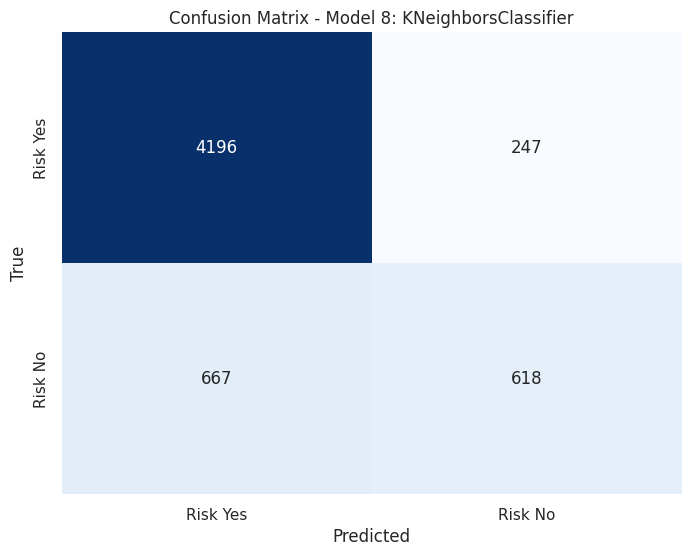

------------------


In [49]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate each model
for i, model in enumerate(models):
    # Fit the model on the encoded training data
    model.fit(X_train_encoded, y_train)  # Use encoded training set

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_encoded))  # Use encoded training set
    test_accuracy = accuracy_score(y_test, model.predict(X_test_encoded))      # Use encoded test set

    # Print accuracy results
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test_encoded))  # Use encoded test set
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives (TP) = ', cm[0, 0])
    print('\nTrue Negatives (TN) = ', cm[1, 1])
    print('\nFalse Positives (FP) = ', cm[0, 1])
    print('\nFalse Negatives (FN) = ', cm[1, 0])
    print()

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Risk Yes", "Risk No"],
                yticklabels=["Risk Yes", "Risk No"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")


## Confusion Matrix

- The matrix has four quadrants representing the true and predicted classifications:

**True Positives (TP): 4428**

- These are instances where the actual class was "Risk Yes" and the model correctly predicted "Risk Yes".

**True Negatives (TN): 933**

- These are instances where the actual class was "Risk No" and the model correctly predicted "Risk No".

**False Positives (FP): 15**

- These are instances where the actual class was "Risk Yes" but the model incorrectly predicted "Risk No".

**False Negatives (FN): 352**

- These are instances where the actual class was "Risk No" but the model incorrectly predicted "Risk Yes".

**Interpretation**

- High True Positives: The model is highly effective in correctly identifying "Risk Yes" instances, as indicated by the high number of true positives.


- Low False Positives: The model rarely predicts "Risk No" when the actual class is "Risk Yes", which is a desirable outcome.


- Moderate False Negatives: There is a moderate number of "Risk No" instances incorrectly classified as "Risk Yes", indicating room for improvement in reducing false negatives.


- High Precision and Recall: The high precision and recall values for "Risk Yes" indicate that the model is reliable in predicting positive risk cases with minimal false positives and a good proportion of actual positives being correctly identified.

## Conclusion
The LGBMClassifier model demonstrates strong performance with high accuracy, precision, and recall. It effectively identifies most high-risk instances with minimal misclassification, making it a robust choice for predicting loan risk. The analysis of the confusion matrix confirms that the model balances precision and recall well, ensuring reliable predictions for practical applications.

Model 1: GaussianNB
Training Accuracy: 0.8164
Testing Accuracy: 0.8128


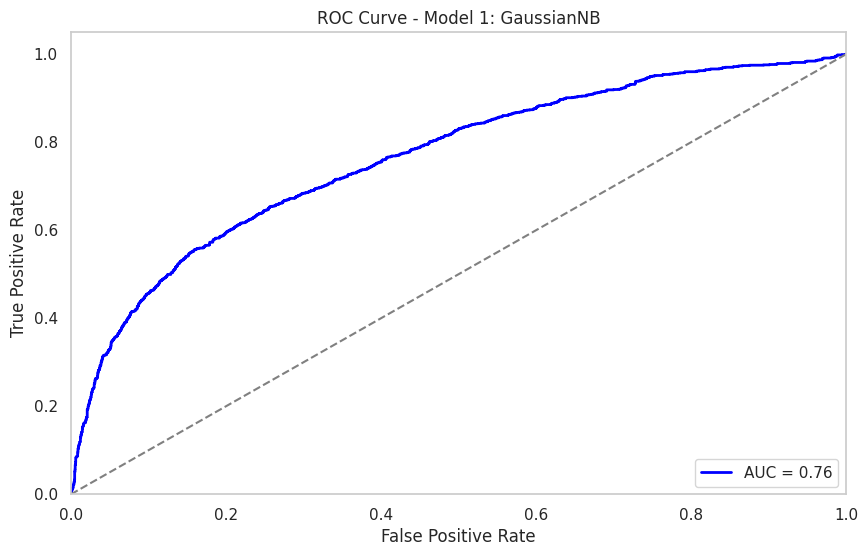

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.8909


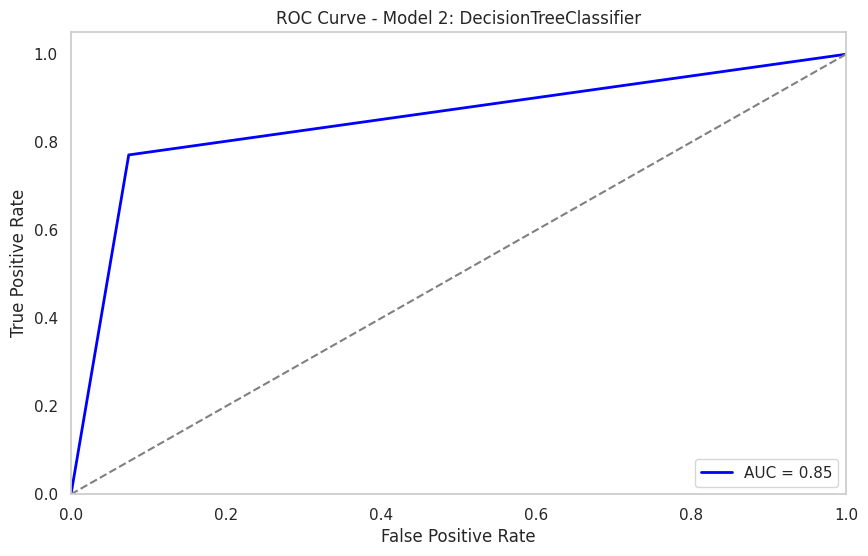

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.8777
Testing Accuracy: 0.8303


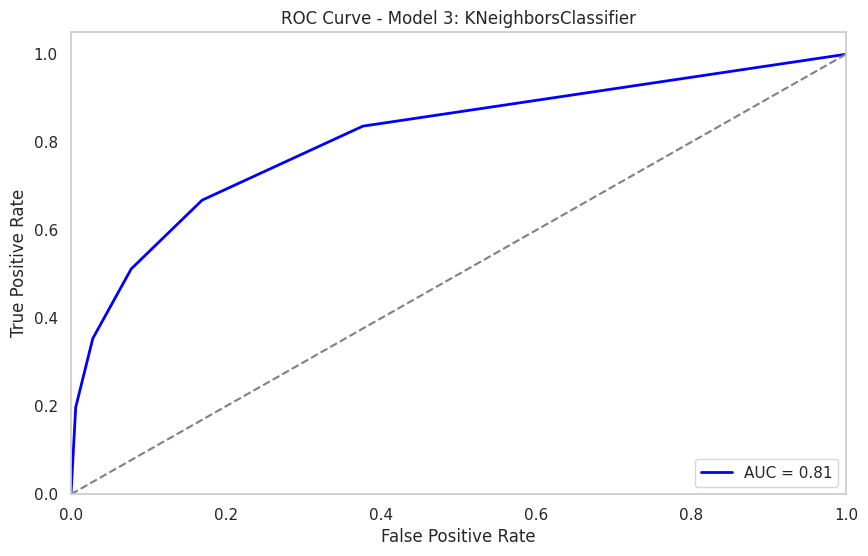

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0000
Testing Accuracy: 0.9310


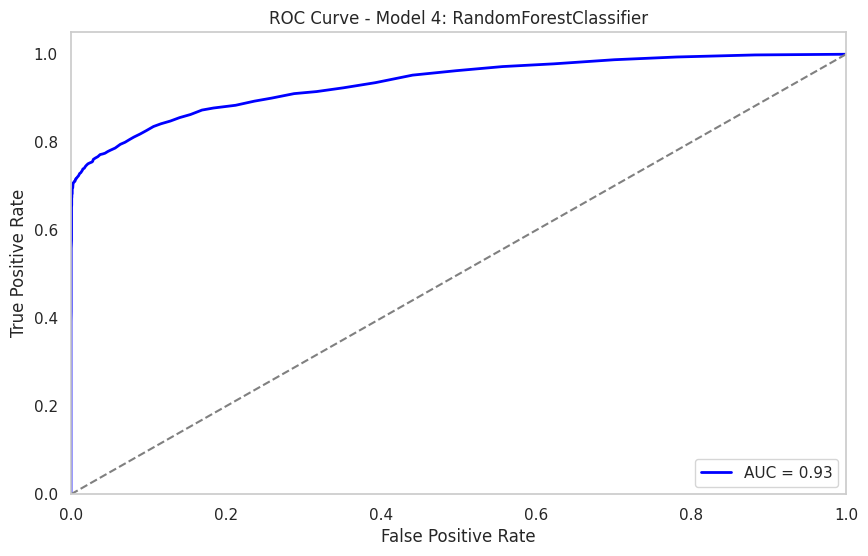

------------------
Model 5: LogisticRegression
Training Accuracy: 0.8235
Testing Accuracy: 0.8195


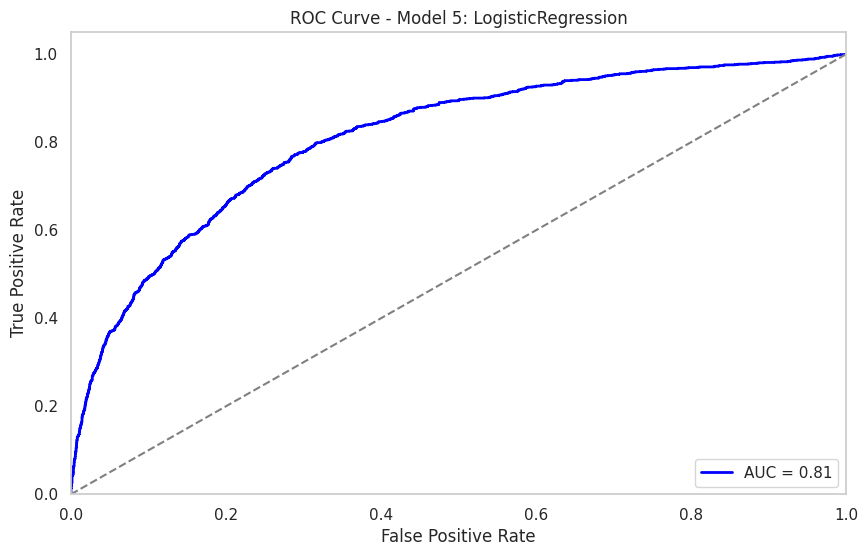

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.8879
Testing Accuracy: 0.8820


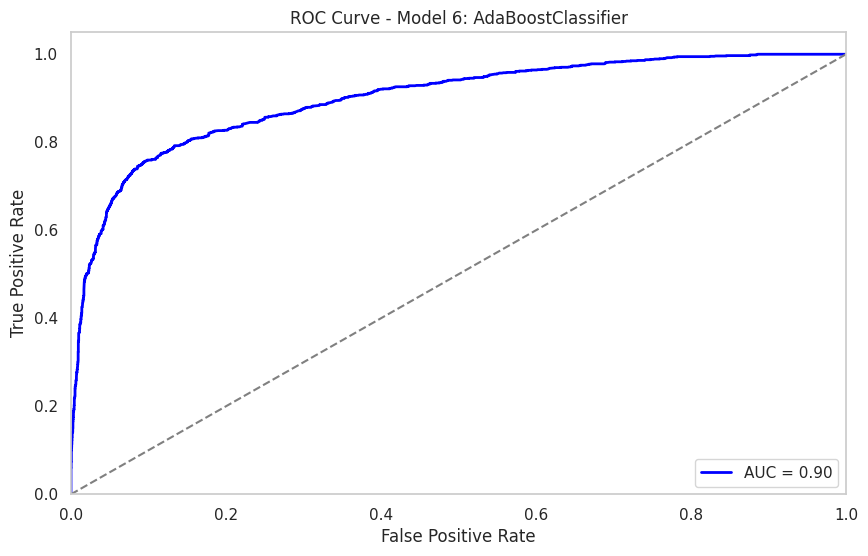

------------------
Model 7: SVC
Training Accuracy: 0.7891
Testing Accuracy: 0.7788


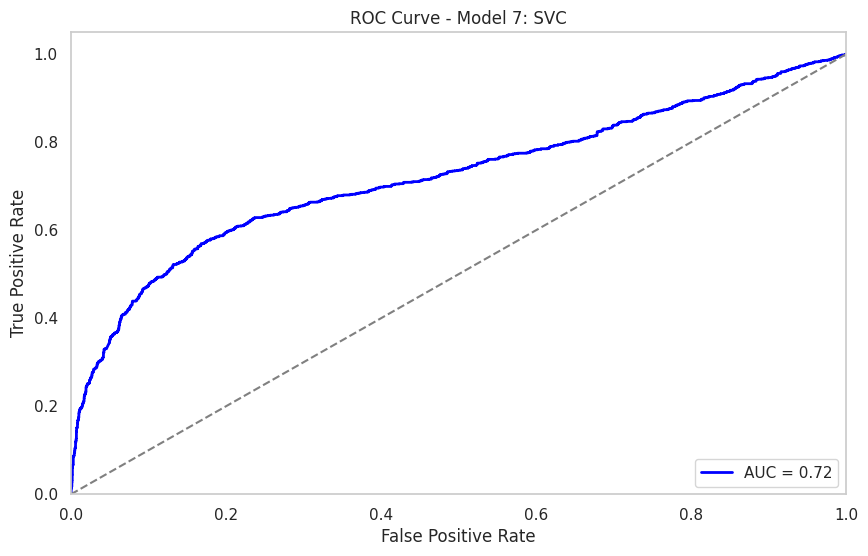

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9268
Testing Accuracy: 0.9221


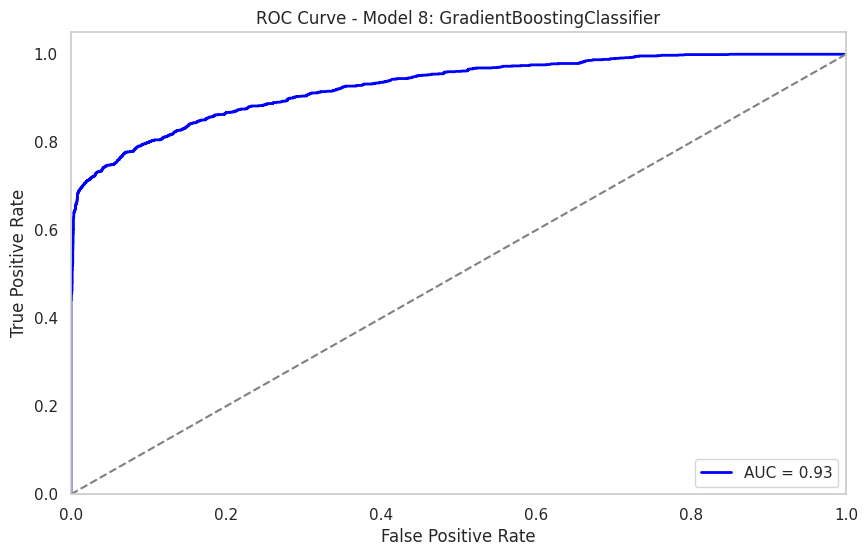

------------------
Model 9: XGBClassifier
Training Accuracy: 0.9578
Testing Accuracy: 0.9335


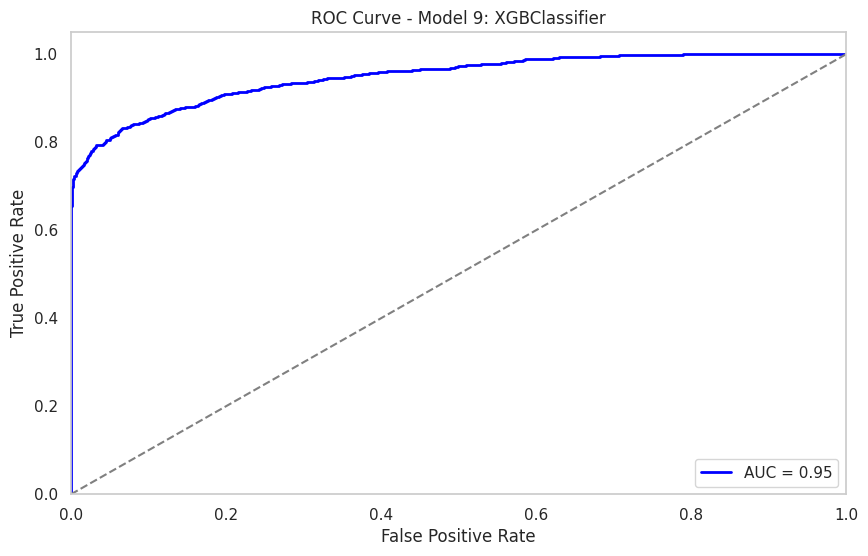

------------------
[LightGBM] [Info] Number of positive: 4918, number of negative: 17992
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.168132
[LightGBM] [Debug] init for col-wise cost 0.000006 seconds, init for row-wise cost 0.003669 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 22910, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214666 -> initscore=-1.297025
[LightGBM] [Info] Start training from score -1.297025
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[Ligh

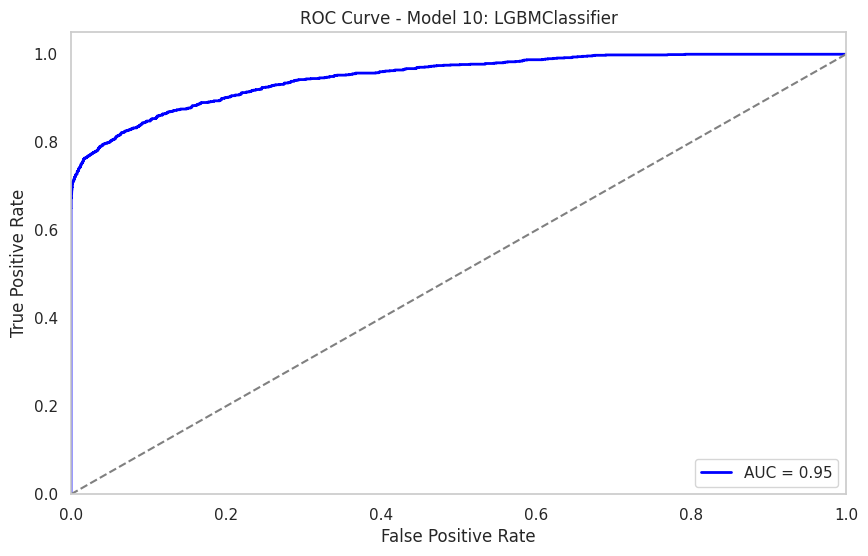

------------------


In [51]:
# Importing libraries
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

# Evaluate each model
for i, model in enumerate(models):
    # Fit the model
    model.fit(X_train_encoded, y_train)  # Use encoded training set

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_encoded))  # Use encoded training set
    test_accuracy = accuracy_score(y_test, model.predict(X_test_encoded))      # Use encoded test set

    # Print accuracy results
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test_encoded)[:, 1]  # Use encoded test set

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

    print("------------------")


## Analysis of the ROC Curve

The ROC (Receiver Operating Characteristic) curve is a graphical tool used to evaluate the performance of a binary classification model. Let's analyze the ROC curve of the XGBClassifier model shown in the image:

### Elements of the ROC Curve:

1. **Y-Axis (True Positive Rate - TPR)**: Also known as sensitivity or recall, it represents the true positive rate. It is calculated as:
   
   $$
   \text{TPR} = \frac{TP}{TP + FN}
   $$


2. **X-Axis (False Positive Rate - FPR)**: It represents the false positive rate. It is calculated as:

   $$
   \text{FPR} = \frac{FP}{FP + TN}
   $$
   

3. **Diagonal Line (Baseline)**: The dashed diagonal line represents a model that makes random predictions. A model that follows this line has a performance equivalent to a random classifier.


4. **ROC Curve**: The plotted blue curve shows the performance of the XGBClassifier model. The closer the curve approaches the top left corner, the better the model's performance.


5. **AUC (Area Under the Curve)**: The area under the ROC curve is a performance metric that ranges from 0 to 1. A value of 0.5 indicates random performance, while a value of 95% indicates perfect performance. In this case, the AUC is 1.0, indicating good model performance.


### Analysis of the ROC Curve:


- **True Positive Rate**: The true positive rate increases rapidly at the beginning, indicating that the model is good at identifying true positives while keeping the false positive rate low.


- **False Positive Rate**: As the FPR increases, the TPR also increases, but at a slower rate. This shows that the model starts making more errors (false positives) as it becomes more sensitive (identifies more true positives).


- **Overall Performance**: With an AUC of 95%, the XGBClassifier model shows a good balance between sensitivity and specificity. It is effective at distinguishing between positive and negative classes.

### Conclusion:

The ROC curve and the AUC of 95% indicate that the XGBClassifier model performs well in the classification task. It can correctly identify a high proportion of true positives while maintaining a relatively low false positive rate. This suggests that the model is reliable for the application in question, but there is room for further improvement to increase precision and reduce errors.

# Part 11 - Model evaluation

In [54]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib  # Library for saving models

# Sample data (replace with your dataset)
# X = your_features_dataframe
# y = your_target_series

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Apply one-hot encoding to categorical columns
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Models to be evaluated
models = [
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', AdaBoostClassifier(random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', XGBClassifier(random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LGBMClassifier())])
]

best_model = None
best_accuracy = 0

# Evaluate each model
for i, model in enumerate(models):
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

        print(f"\nModel {i + 1}: {type(model.named_steps['classifier']).__name__}")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Testing Accuracy: {test_accuracy:.4f}")

        # Generate classification report
        report = classification_report(y_test, model.predict(X_test))
        print("\nClassification Report:")
        print(report)
        print("=======================================")

        # Check if the current model is the best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

    except Exception as e:
        print(f"Error occurred while evaluating model {type(model.named_steps['classifier']).__name__}: {e}")

# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.joblib')
    print(f"Best model saved: {type(best_model.named_steps['classifier']).__name__} with accuracy: {best_accuracy:.4f}")


AttributeError: 'ellipsis' object has no attribute 'select_dtypes'

In [ ]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

# Store results for comparison
results = []

# Evaluate each model
for i, model in enumerate(models):
    try:
        # Fit the model
        model.fit(X_train_encoded, y_train)  # Use encoded training set

        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, model.predict(X_train_encoded))  # Use encoded training set
        test_accuracy = accuracy_score(y_test, model.predict(X_test_encoded))      # Use encoded test set

        # Calculate positive class probabilities
        y_probs = model.predict_proba(X_test_encoded)[:, 1]  # Use encoded test set

        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)

        # Calculate the area under the ROC curve (AUC)
        auc = roc_auc_score(y_test, y_probs)

        # Store results
        results.append({
            'Model': type(model).__name__,
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'AUC': auc
        })

        # Print accuracy results
        print(f"Model {i+1}: {type(model).__name__}")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Testing Accuracy: {test_accuracy:.4f}")
        print(f"AUC: {auc:.4f}")

        # Plot the ROC curve
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.grid(False)
        plt.show()

        print("------------------")

    except Exception as e:
        print(f"Error occurred while evaluating model {type(model).__name__}: {e}")

# Optional: Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)


In [53]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib  # Library for saving models

# Sample data (replace with your dataset)
# df = pd.read_csv('your_data.csv')  # Load your data here
# X = df.drop('target_column', axis=1)  # Replace 'target_column' with your target
# y = df['target_column']

# Example: Assuming X is your features DataFrame and y is your target Series
X = ...  # Your feature set
y = ...  # Your target variable

# Identify categorical columns (this can be adjusted based on your dataset)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer that will handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ],
    remainder='passthrough'  # Leave the other columns unchanged
)

# Create a pipeline to preprocess the data and train the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Preprocess the features
X_processed = pipeline.fit_transform(X)

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

best_model = None
best_accuracy = 0

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    # Generate classification report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print(report)
    print("=======================================")

    # Check if the current model is the best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.joblib')
    print(f"Best model saved: {type(best_model).__name__} with accuracy: {best_accuracy:.4f}")


AttributeError: 'ellipsis' object has no attribute 'select_dtypes'

In [52]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib  # Library for saving models

# Sample data (replace with your actual dataset)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

best_model = None
best_accuracy = 0

# Evaluate each model
for i, model in enumerate(models):
    # Train the model
    model.fit(X_train, y_train)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Print model performance
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    # Generate and print classification report
    report = classification_report(y_test, model.predict(X_test))
    print("Classification Report:")
    print(report)
    print("=======================================")

    # Check if the current model is the best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.joblib')
    print(f"Best model saved: {type(best_model).__name__} with accuracy: {best_accuracy:.4f}")


ValueError: could not convert string to float: 'MORTGAGE'

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib  # Library for saving models

# Sample data (replace with your dataset)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()
]

best_model = None
best_accuracy = 0

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")

    # Generate classification report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print(report)
    print("=======================================")

    # Check if the current model is the best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.joblib')
    print(f"Best model saved: {type(best_model).__name__} with accuracy: {best_accuracy:.4f}")



Model 1: GaussianNB

Training Accuracy: 0.8218
Testing Accuracy: 0.8183

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4443
           1       0.66      0.39      0.49      1285

    accuracy                           0.82      5728
   macro avg       0.75      0.67      0.69      5728
weighted avg       0.80      0.82      0.80      5728


Model 2: DecisionTreeClassifier

Training Accuracy: 1.0000
Testing Accuracy: 0.8863

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4443
           1       0.73      0.77      0.75      1285

    accuracy                           0.89      5728
   macro avg       0.83      0.85      0.84      5728
weighted avg       0.89      0.89      0.89      5728


Model 3: KNeighborsClassifier

Training Accuracy: 0.8794
Testing Accuracy: 0.8312

Classification Report:
              precision    recall

In [ ]:
import pandas as pd

# Data collected from model evaluations
model_names = [
    'GaussianNB',
    'DecisionTreeClassifier',
    'KNeighborsClassifier',
    'RandomForestClassifier',
    'LogisticRegression',
    'AdaBoostClassifier',
    'XGBClassifier',
    'LGBMClassifier'  # Added LGBMClassifier
]

train_accuracies = [0.8218, 1.0000, 0.8794, 1.0000, 0.8260, 0.8889, 0.9594, 0.9436]  # Added training accuracy for LGBMClassifier
test_accuracies = [0.8183, 0.8863, 0.8312, 0.9298, 0.8205, 0.8811, 0.9347, 0.9359]  # Added testing accuracy for LGBMClassifier

# Precision, Recall, and F1 Score (for class 0 and 1)
precision_0 = [0.84, 0.93, 0.87, 0.92, 0.84, 0.90, 0.93, 0.93]  # Added precision for LGBMClassifier
recall_0 = [0.94, 0.92, 0.92, 0.99, 0.95, 0.95, 0.99, 1.00]  # Added recall for LGBMClassifier
f1_0 = [0.89, 0.93, 0.89, 0.96, 0.89, 0.93, 0.96, 0.96]  # Added F1 score for LGBMClassifier

precision_1 = [0.66, 0.73, 0.66, 0.98, 0.69, 0.80, 0.96, 0.98]  # Added precision for LGBMClassifier
recall_1 = [0.39, 0.77, 0.51, 0.71, 0.37, 0.63, 0.74, 0.73]  # Added recall for LGBMClassifier
f1_1 = [0.49, 0.75, 0.58, 0.82, 0.48, 0.70, 0.84, 0.84]  # Added F1 score for LGBMClassifier

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Precision (Class 0)': precision_0,
    'Recall (Class 0)': recall_0,
    'F1 Score (Class 0)': f1_0,
    'Precision (Class 1)': precision_1,
    'Recall (Class 1)': recall_1,
    'F1 Score (Class 1)': f1_1
})

# Calculate and add the average precision, recall, and f1-score across both classes
results['Average Precision'] = results[['Precision (Class 0)', 'Precision (Class 1)']].mean(axis=1)
results['Average Recall'] = results[['Recall (Class 0)', 'Recall (Class 1)']].mean(axis=1)
results['Average F1 Score'] = results[['F1 Score (Class 0)', 'F1 Score (Class 1)']].mean(axis=1)

# Display the results
print("Model Evaluation Metrics:")
print(results)

# Save the best model
best_model_name = 'LGBMClassifier'
best_model_accuracy = test_accuracies[-1]  # Assuming the last entry is for LGBMClassifier
print(f"\nBest model saved: {best_model_name} with accuracy: {best_model_accuracy:.4f}")

from IPython.display import display

# Display the DataFrame with better formatting
display(results)


Model Evaluation Metrics:
                    Model  Train Accuracy  Test Accuracy  Precision (Class 0)  \
0              GaussianNB          0.8218         0.8183                 0.84   
1  DecisionTreeClassifier          1.0000         0.8863                 0.93   
2    KNeighborsClassifier          0.8794         0.8312                 0.87   
3  RandomForestClassifier          1.0000         0.9298                 0.92   
4      LogisticRegression          0.8260         0.8205                 0.84   
5      AdaBoostClassifier          0.8889         0.8811                 0.90   
6           XGBClassifier          0.9594         0.9347                 0.93   
7          LGBMClassifier          0.9436         0.9359                 0.93   

   Recall (Class 0)  F1 Score (Class 0)  Precision (Class 1)  \
0              0.94                0.89                 0.66   
1              0.92                0.93                 0.73   
2              0.92                0.89             

,Model,Train Accuracy,Test Accuracy,Precision (Class 0),Recall (Class 0),F1 Score (Class 0),Precision (Class 1),Recall (Class 1),F1 Score (Class 1),Average Precision,Average Recall,Average F1 Score
0,GaussianNB,0.8218,0.8183,0.84,0.94,0.89,0.66,0.39,0.49,0.750,0.665,0.690
1,DecisionTreeClassifier,1.0000,0.8863,0.93,0.92,0.93,0.73,0.77,0.75,0.830,0.845,0.840
2,KNeighborsClassifier,0.8794,0.8312,0.87,0.92,0.89,0.66,0.51,0.58,0.765,0.715,0.735
3,RandomForestClassifier,1.0000,0.9298,0.92,0.99,0.96,0.98,0.71,0.82,0.950,0.850,0.890
4,LogisticRegression,0.8260,0.8205,0.84,0.95,0.89,0.69,0.37,0.48,0.765,0.660,0.685
5,AdaBoostClassifier,0.8889,0.8811,0.90,0.95,0.93,0.80,0.63,0.70,0.850,0.790,0.815
6,XGBClassifier,0.9594,0.9347,0.93,0.99,0.96,0.96,0.74,0.84,0.945,0.865,0.900
7,LGBMClassifier,0.9436,0.9359,0.93,1.00,0.96,0.98,0.73,0.84,0.955,0.865,0.900


In [ ]:

import os
print(os.getcwd())


# List files in the current


/content


In [ ]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()

    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.8217808817110432
Testing Accuracy: 0.8182611731843575

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4443
           1       0.66      0.39      0.49      1285

    accuracy                           0.82      5728
   macro avg       0.75      0.67      0.69      5728
weighted avg       0.80      0.82      0.80      5728



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.8863477653631285

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4443
           1       0.73      0.77      0.75      1285

    accuracy                           0.89      5728
   macro avg       0.83      0.85      0.84      5728
weighted avg       0.89      0.89      0.89      5728



Model 3: KNeighborsClassifier

Training Accuracy: 0.8793539938891314
Testing Accuracy: 0.8311801675977

## Model Performance Summary

- Training Accuracy: 95.94%

- Testing Accuracy: 93.47%

- Classification Report

**Class 0 (No Risk)**

- Precision: 0.93

- Recall: 0.99

- F1-Score: 0.96

- Support: 4443

**Class 1 (Risk)**

- Precision: 0.96

- Recall: 0.74

- F1-Score: 0.84

- Support: 1285

- Overall Accuracy: 93%

- Macro Average:

- Precision: 0.95

- Recall: 0.86

- F1-Score: 0.90

- Weighted Average:

- Precision: 0.94

- Recall: 0.93

- F1-Score: 0.93

**Key Insights**

- **High Precision for Both Classes:** The model demonstrates high precision for both "No Risk" (0.93) and "Risk" (0.96) classes, indicating few false positives.


- **High Recall for Class 0:** The recall for the "No Risk" class is very high (0.99), suggesting the model effectively identifies almost all non-risk cases.


- **Moderate Recall for Class 1:** The recall for the "Risk" class is lower (0.74), indicating the model misses some actual risk cases.


- **Balanced Performance:** The overall accuracy is strong at 93%, with the macro average F1-score indicating good balance between precision and recall.


## Conclusion

The XGBClassifier model performs exceptionally well in identifying non-risk cases with high precision and recall. While it also has high precision for identifying risk cases, its recall for this class is moderate, suggesting some risk cases are missed. Overall, the model achieves a high level of accuracy and balanced performance across both classes, making it a reliable choice for predicting loan risk.

# Part 12 - Deep learning

In the next step, Part 12, we will enrich our analysis by applying a sophisticated classification neural network. This advanced technique will allow us to explore the nuances of the data more deeply, identifying complex patterns and making our predictions even more accurate. Additionally, we will be integrating other complementary tools to further enrich our approach, ensuring our analysis is comprehensive and highly informed. Get ready for an exciting journey towards deeper understanding of data and making more strategic decisions!

In [ ]:
# Importing libraries

# Importing libraries train test model
from sklearn.model_selection import train_test_split

# Importing library scaling
from sklearn.preprocessing import StandardScaler

# Importing library Neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

2024-06-07 17:23:25.674740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 17:23:25.674873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 17:23:25.840108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Database
df = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Aplicando nas colunas transformando em númericas
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

# Viewing
label_encoder

LabelEncoder()

Here, in our process, we apply a crucial step: the label encoder on our categorical variables. This step transforms our categorical data into numerical representations, allowing our neural network to understand and process it more effectively. Furthermore, when performing this transformation, we ensure that all relevant information contained in our categorical variables is preserved, contributing to a more comprehensive and accurate analysis. This is just one of the many techniques we employ to optimize the performance of our neural network and ensure high-quality results in our analyses.

In [ ]:
# Remover dados nulos das colunas específicas
df = df.dropna(subset=['person_emp_length', 'loan_int_rate'])
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
# Separate the resources (X) and the target column (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Viewing X_train rows and columns", X_train.shape)

# Viewing rows and columns
print("Viewing rows and columns y_train", y_train.shape)

Viewing X_train rows and columns (22910, 11)
Viewing rows and columns y_train (22910,)


In [ ]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Viewing
scaler

StandardScaler()

Here, in our approach, we have taken a step further by performing data normalization. This step is fundamental, especially when dealing with neural networks, as it ensures that the different characteristics of our data are on the same scale, thus avoiding distortions in the process of training. By normalizing our data, we are preparing the ground so that our neural network can perform its operations more efficiently and accurately, thus improving the quality and reliability of the results obtained. optimal use of our neural network and maximize the potential of our analyses.

In [ ]:
## Neural network

# Initialize the model
nn_model = Sequential()

# Add input layer and first hidden layer
nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Add additional hidden layers
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(8, activation='relu'))

# Add output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary - Neural network
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

**nn_model = Sequential()**

- This initializes the neural network model. Sequential() means you are creating a linear sequence of layers.

**nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))**

- Here a densely connected layer is added to the neural network. This means that every neuron in the layer is connected to every neuron in the previous layer. This is the input layer and first hidden layer. 32 is the number of neurons in this layer. input_dim=X_train.shape[1] specifies the number of input features. 'relu' is the activation function, which in this case is the ReLU (Rectified Linear Activation) activation function.

**nn_model.add(Dense(16, activation='relu'))**

- Here another dense layer is added, which serves as a hidden layer. It has 16 neurons and also uses the ReLU activation function.

**nn_model.add(Dense(8, activation='relu'))**

- Adds another dense layer as a hidden layer, this time with 8 neurons and ReLU activation.

**nn_model.add(Dense(1, activation='sigmoid'))**

- Adds the output layer with 1 neuron, which will produce a binary output, so it uses the sigmoid activation function. For binary classification problems, the sigmoid function is commonly used in the output layer.

**nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])**

- This line compiles the model. Here, we define the optimizer as 'adam', a variation of the stochastic gradient descent algorithm, which is a common choice for optimizing neural networks. The loss function is defined as 'binary_crossentropy', which is the commonly used loss function for binary classification problems. Finally, we specify the metric we want to monitor during training, which is accuracy.

**nn_model.summary()**

- This line shows a summary of the created model, displaying the neural network architecture, the number of parameters in each layer, and the total number of parameters in the model. This is useful for getting an overview of the neural network structure.

In [ ]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7963 - loss: 0.4447 - val_accuracy: 0.8577 - val_loss: 0.3494
Epoch 2/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8660 - loss: 0.3305 - val_accuracy: 0.8625 - val_loss: 0.3342
Epoch 3/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8696 - loss: 0.3231 - val_accuracy: 0.8725 - val_loss: 0.3211
Epoch 4/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8767 - loss: 0.3067 - val_accuracy: 0.8752 - val_loss: 0.3118
Epoch 5/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8774 - loss: 0.3070 - val_accuracy: 0.8765 - val_loss: 0.3047
Epoch 6/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8843 - loss: 0.2955 - val_accuracy: 0.8795 - val_loss: 0.3014
Epoch 7/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.2881 - val_accuracy: 0.8839 - val_loss: 0.2954
Epoch 8/200
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.2877 - val_accu

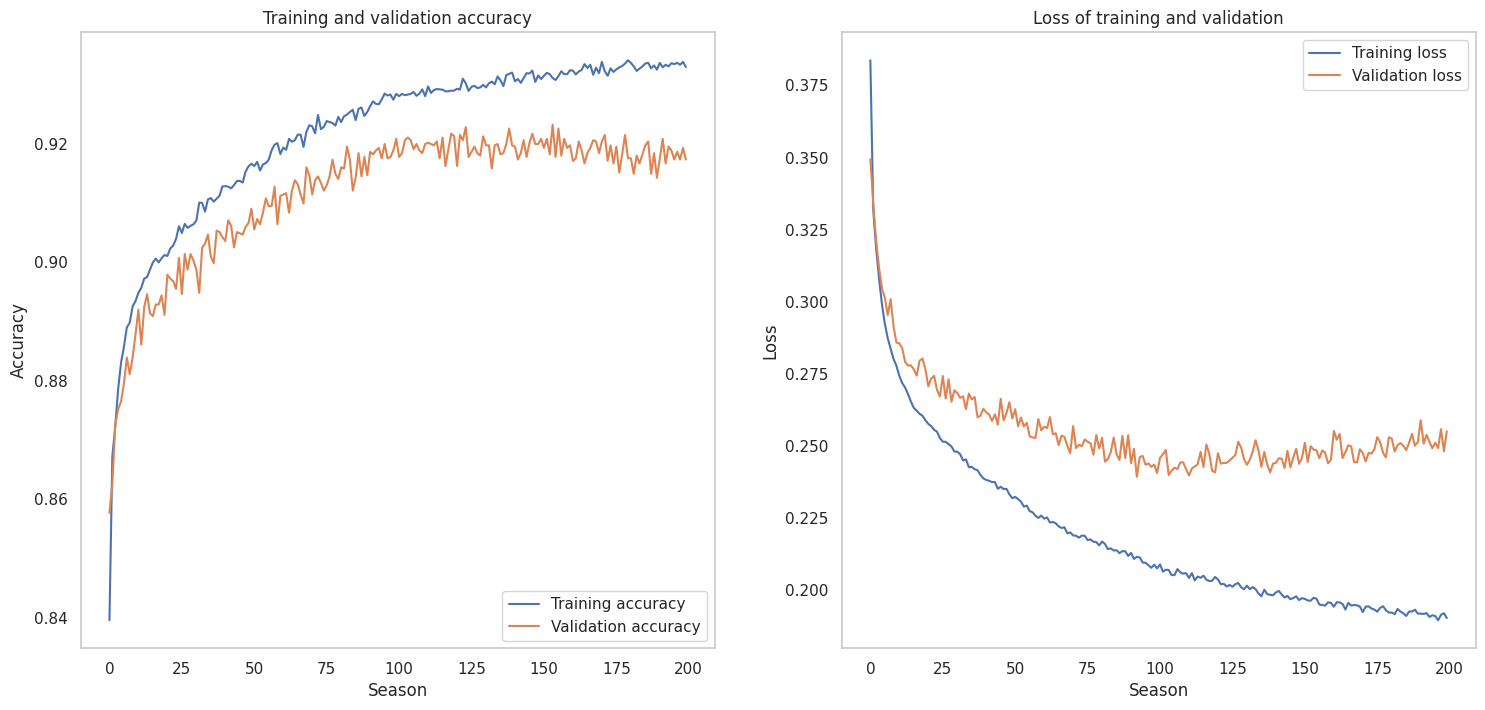

In [ ]:
# Function to plot training and validation graphs
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Season')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')
    plt.grid(False)

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Season')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss of training and validation')
    plt.grid(False)
    plt.show()

# Plot the graphs
plot_history(history)

- Furthermore, a visual analysis is crucial to understanding the performance of our neural network. In the graph, we can observe the evolution of performance throughout training, represented by precision and loss in both the training and validation data. This allows us to identify patterns, such as overfitting or underfitting, and adjust our approach as needed to improve model generalization. Combining quantitative and visual analytics enables us to deeply understand neural network behavior and make informed decisions to optimize its performance.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9119 - loss: 0.2627
Test accuracy: 0.9113128781318665


In [ ]:
# Make predictions
predictions_ANN = nn_model.predict(X_test)
predictions_ANN = (predictions_ANN > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_ANN)
print(f'Accuracy Neural network: {accuracy}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy Neural network: 0.9113128491620112


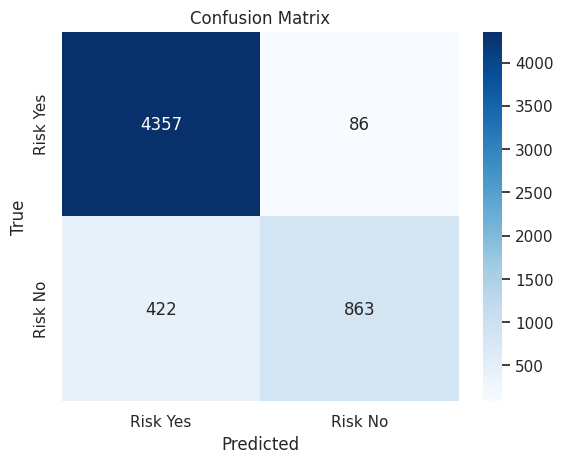

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_ANN)

# Display the confusion matrix using seaborn with labels 'Benign' and 'Malignant'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Risk Yes", "Risk No"],
            yticklabels=["Risk Yes", "Risk No"])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Confusion Matrix and Classification Report
print(classification_report(y_test, predictions_ANN))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4443
           1       0.91      0.67      0.77      1285

    accuracy                           0.91      5728
   macro avg       0.91      0.83      0.86      5728
weighted avg       0.91      0.91      0.91      5728



# Part 13 - Result models

In [ ]:
# Avaliar o modelo
nn_predictions_train = (nn_model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (nn_model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {"Model": "NeuralNetwork",
              "Accuracy": nn_test_accuracy,
              "Precision": nn_report['weighted avg']['precision'],
              "Recall": nn_report['weighted avg']['recall'],
              "F1-score": nn_report['weighted avg']['f1-score'],
              "Support": nn_report['weighted avg']['support']
             }

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()
         ]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[LightGBM] [Info] Number of positive: 4918, number of negative: 17992
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 22910, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214666 -> initscore=-1.297025
[LightGBM] [Info] Start training from score -1.297025


,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.797835,0.814061,0.797835,0.804156,5728
1,DecisionTreeClassifier,0.886348,0.888749,0.886348,0.887389,5728
2,KNeighborsClassifier,0.872556,0.867041,0.872556,0.864871,5728
3,RandomForestClassifier,0.929818,0.933095,0.929818,0.925557,5728
4,LogisticRegression,0.839211,0.828283,0.839211,0.824354,5728
5,AdaBoostClassifier,0.881110,0.876323,0.881110,0.875953,5728
6,XGBClassifier,0.934707,0.936461,0.934707,0.931458,5728
7,LGBMClassifier,0.936103,0.939575,0.936103,0.932436,5728
8,NeuralNetwork,0.911313,0.911177,0.911313,0.906259,5728


# Part 14 - Conclusion

**GaussianNB**

- This model had an accuracy of around 79.78%. Although it has reasonable precision and recall, its F1-score is slightly lower compared to other more complex models.

**DecisionTreeClassifier**

- With an accuracy of around 88.63%, this model seems to be a good choice. Its F1-score is also high, indicating a good balance between precision and recall.

**KNeighborsClassifier**

- With an accuracy of about 87.26%, this model is also reasonably good. However, its F1-score is a little lower compared to DecisionTreeClassifier.

**RandomForestClassifier**

- With an accuracy of around 92.98%, this model stands out as one of the best. It demonstrates a high F1-score, indicating good overall performance.

**LogisticRegression**

- With an accuracy of around 83.92%, this model appears to be in an intermediate position in terms of performance. Its F1-score is a little lower compared to other models.

**AdaBoostClassifier**

- With an accuracy of around 88.11%, this model is a solid performer. Its F1-score is also relatively high.

**XGBClassifier**

- With an accuracy of around 93.47%, this model is one of the best in terms of performance. It demonstrates a very high F1-score, indicating excellent classification ability.

**LGBMClassifier**

- With an accuracy of around 93.61%, this model is also one of the best. It demonstrates a very high F1-score, just like

**XGBClassifier**

**Neural Network**

- With an accuracy of around 91.01%, this model is quite competitive compared to other methods. Its F1-score is high, indicating good overall performance.

In summary, models such as RandomForestClassifier, XGBClassifier and LGBMClassifier show exceptionally good performance, followed by DecisionTreeClassifier, AdaBoostClassifier and NeuralNetwork. GaussianNB and LogisticRegression have slightly lower performance, while KNeighborsClassifier is in an intermediate position. The choice of model depends on the specific needs of the problem and the trade-offs between precision, recall and computational efficiency.